# (a) Data Processing
1.  Download and read the data

In [3]:
import pandas as pd
train = pd.read_csv('data_train.csv', index_col=0) # index column removes the first column from the data that contains the index (pandas will do anyways)
test = pd.read_csv('data_test.csv', index_col=0)
train
test

NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0       -200.0       8.0          898.0    122.0         933.0    105.0   
1       -200.0      19.4         1281.0   -200.0         774.0   -200.0   
2       -200.0       9.9          975.0    349.0         638.0    223.0   
3       -200.0      12.7         1075.0    103.0         749.0     98.0   
4       -200.0       2.9          647.0    131.0        1054.0     85.0   
...        ...       ...            ...      ...           ...      ...   
3216    -200.0      12.5         1068.0    171.0         899.0    139.0   
3217    -200.0       9.6          964.0   -200.0         953.0   -200.0   
3218    -200.0       1.2          522.0     61.0        1242.0     55.0   
3219    -200.0       8.7          927.0   -200.0         750.0   -200.0   
3220    -200.0      10.7         1004.0     90.0         724.0    114.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1594.0       1098.0  17.0  51.7  0.9914  
1           1952.0       1324.0  20.8  43.6  1.0614  
2           1243.0       1064.0   5.6  74.6  0.6826  
3           1690.0       1022.0  31.7  21.5  0.9902  
4            962.0        828.0   8.4  54.5  0.6022  
...            ...          ...   ...   ...     ...  
3216        1663.0       1374.0  23.8  28.2  0.8219  
3217        1513.0        770.0  26.3  24.8  0.8393  
3218        1070.0        471.0  10.8  78.7  1.0202  
3219        1659.0        727.0  34.0  33.2  1.7395  
3220        1704.0        899.0  31.8  34.5  1.5911  

[3221 rows x 11 columns]

2.  Read the first 5 rows<br>
    Print the shape of train<br>
    Describe the data<br>

   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        797.0    -200.0       2.1          593.0    146.0        1212.0   
1       1282.0    -200.0      11.0         1013.0    354.0         545.0   
2        891.0    -200.0       7.6          882.0    342.0         885.0   
3       1285.0    -200.0      18.1         1243.0    481.0         599.0   
4        892.0    -200.0       7.3          869.0     71.0         953.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0     72.0         984.0        494.0  10.8  49.7  0.6429  
1    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2    149.0         950.0        894.0   7.8  33.9  0.3594  
3    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4     77.0        1363.0        632.0  37.4  14.7  0.9295  
Shape: (6250, 12)

       PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  6173.000000  6173.000000  6173.000000    6173.000000  6173.000000   
mean   1053.

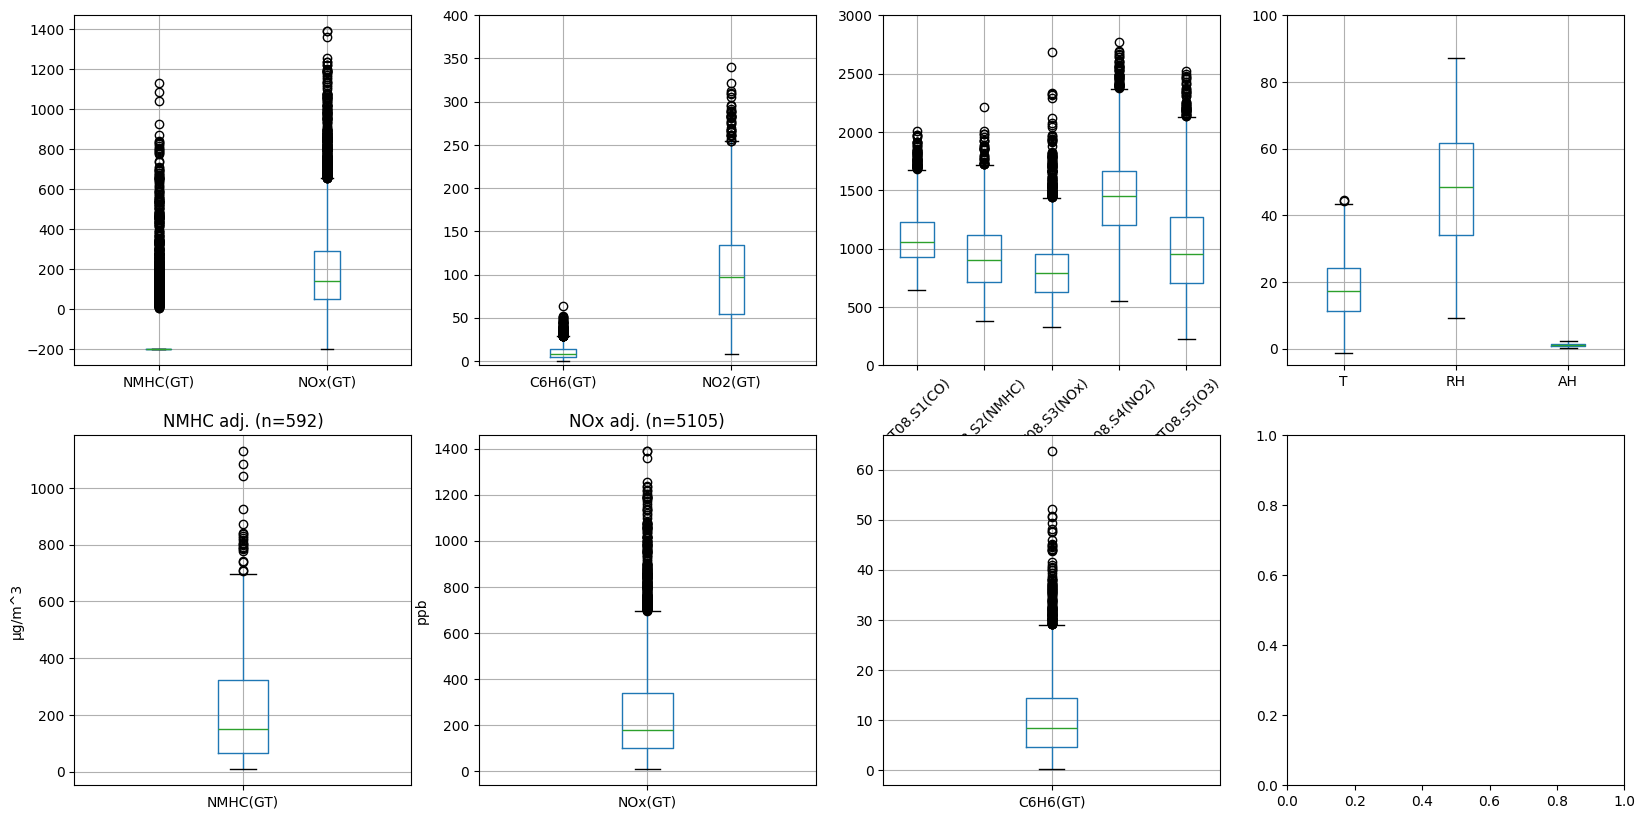

In [4]:
print(train.head()) # print (default 5) rows from the data
print(f'Shape: {train.shape}\n') # print shape
print(train.describe()) # len, mean, std, min, 25,50,75%, max
import matplotlib.pyplot as plt
# plot boxplots of the important labels
fig , axes = plt.subplots(
    nrows=2,
    ncols=4,
    figsize=(20, 10))
train.boxplot(column=['NMHC(GT)','NOx(GT)'], ax=axes[0,0])
train.boxplot(column=['C6H6(GT)','NO2(GT)'], ax=axes[0,1])
axes[0,1].set_ylim(-5,400)
train.boxplot(column=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'], ax=axes[0,2])
axes[0,2].set_xticklabels(['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'],rotation=45)
axes[0,2].set_ylim(0,3000)
train.boxplot(column=['T','RH','AH'], ax=axes[0,3])
axes[0,3].set_ylim(-5,100)
nmhc = train.loc[train['NMHC(GT)']>-200]
nmhc.boxplot(column=['NMHC(GT)'] ,ax=axes[1,0])
axes[1,0].set_title(f'NMHC adj. (n={len(nmhc)})')
axes[1,0].set_ylabel('μg/m^3')
nox = train.loc[train['NOx(GT)']>-200]
nox.boxplot(column=['NOx(GT)'], ax=axes[1,1])
axes[1,1].set_title(f'NOx adj. (n={len(nox)})')
axes[1,1].set_ylabel('ppb')
c6h6 = train.loc[train['C6H6(GT)']>-200]
c6h6.boxplot(column=['C6H6(GT)'], ax=axes[1,2])
plt.show()

NMHC(GT) - hourly avg all non-metanic hydrocarbons μg/m^3<br>
&emsp;There are so many -200 datapoints that the boxplot is fixated on -200<br>
&emsp;&emsp;I would recommend ignoring these points as they are likely an error (that should be addressed) or an input for a negative reading<br>
&emsp;&emsp;the NMHC adjusted boxplot shows the data that is not -200 with only 592 remaining datapoints<br>
&emsp;the boxplot of the NMHC "outliers" show most weight in the 0~300 range with the remaining values 300~700 and outliers as high as 1129<br>
&emsp;NMHC data is scewed low, even after the negative values were removed but it is not unusual for averages as high as 700μg/m^3<br>
NOx(GT) - avg NOx ppb<br>
&emsp;This dataset had enough -200 datapopints that the boxplot is affected, though not as much as the NMHC graph<br>
&emsp;after removing the -200 datapoints (roughly 1000) we have a graph looking very similar to NMHC adjusted<br>
&emsp;skew low, most weight 0~350, often as high as 700ppm and can be as high as 1400ppm<br>
C6H6(GT) - hourly avg benzene μg/m^3<br>
&emsp;C6H6 really deserved its own subplot, even next to the low NO2 values C6H6 is still tiny<br>
&emsp;Subplot[1,2] shows C6H6<br>
&emsp;&emsp;I'll mention that I removed the -200 datapoints in this plot, but since they were already marked as outliers, this should not affect the data<br>
&emsp;low skew, weighted 0~15, often as high as 30 with outliers up to 65μg/m^3<br>
&emsp;lowest values in the data (not including average/relative humidity or temperature)<br>
NO2(GT) - avg NO2 μg/m^3<br>
&emsp;dataset with the next-smallest values<br>
&emsp;NO2 is much closer to an even distribution between 15~255 but still skews low, towards values lower than 134 (75%)<br>
<br>
<pre>
        PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3) avg sensor response<br>
mean    1053.137534     900.956747    789.718775   1400.209785   983.046331 <br>
std      330.409118     343.097628    320.048320    466.410914   459.039659<br>
min     -200.000000    -200.000000   -200.000000   -200.000000  -200.000000 <br>
25%      924.000000     715.000000    631.000000   1199.000000   703.000000<br>
50%     1055.000000     903.000000    790.000000   1454.000000   951.000000 <br>
75%     1226.000000    1117.000000    954.000000   1669.000000  1274.000000 <br>
max     2008.000000    2214.000000   2683.000000   2775.000000  2519.000000<br>
</pre><br>
S4 and S5 have wider spreads<br>
S1,2,3,5 skew low<br>
S4 skews towards the middle between 1200~1670<br>
I later found that S4,5 values were being dragged down by more -200 datapoints
<br>
(assuming S2-4 are used to detect actual levels of compounds)<br>
the intersection between NMHC adj. and S2(NMHC) shows that S2 will miss >75% of actual NMHC<br>
the intersection between NOx adj. and S3(NOx) shows that S3 will catch ~25% of actual NOx<br>
the intersection between NO2 and S4(NO2) shows that S4 will not catch actual NO2<br>

3. Does the data have missing values? Return the number of missing values

In [5]:
train.isna() # display a boolean table with true values where data in the DataFrame is null

PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0           False     False     False          False    False         False   
1           False     False     False          False    False         False   
2           False     False     False          False    False         False   
3           False     False     False          False    False         False   
4           False     False     False          False    False         False   
...           ...       ...       ...            ...      ...           ...   
6245        False     False     False          False    False         False   
6246        False     False     False          False    False         False   
6247        False     False     False          False    False         False   
6248        False     False     False          False    False         False   
6249         True      True      True           True     True          True   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH     AH  
0       False         False        False  False  False  False  
1       False         False        False  False  False  False  
2       False         False        False  False  False  False  
3       False         False        False  False  False  False  
4       False         False        False  False  False  False  
...       ...           ...          ...    ...    ...    ...  
6245    False         False        False  False  False  False  
6246    False         False        False  False  False  False  
6247    False         False        False  False  False  False  
6248    False         False        False  False  False  False  
6249     True          True         True   True   True   True  

[6250 rows x 12 columns]

In [6]:
train.isna().sum() # count of null values per column

PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64

4. Drop rows with missing data

In [7]:
train.dropna(inplace=True) # drop null values from the data, default:inplace=False generates a new table | inplace=True alters current DataFrame

5. Extract the features and the label

In [8]:
print(f'Labels: {list(train.columns)}')
train.describe()

Labels: ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  6173.000000  6173.000000  6173.000000    6173.000000  6173.000000   
mean   1053.137534  -159.131865     2.105864     900.956747   172.548032   
std     330.409118   141.196552    41.223190     343.097628   259.096948   
min    -200.000000  -200.000000  -200.000000    -200.000000  -200.000000   
25%     924.000000  -200.000000     4.100000     715.000000    52.000000   
50%    1055.000000  -200.000000     8.100000     903.000000   142.000000   
75%    1226.000000  -200.000000    14.000000    1117.000000   293.000000   
max    2008.000000  1129.000000    63.700000    2214.000000  1389.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   6173.000000  6173.000000   6173.000000  6173.000000  6173.000000   
mean     789.718775    59.277175   1400.209785   983.046331    10.014256   
std      320.048320   126.634023    466.410914   459.039659    43.027677   
min     -200.000000  -200.000000   -200.000000  -200.000000  -200.000000   
25%      631.000000    54.000000   1199.000000   703.000000    11.200000   
50%      790.000000    97.000000   1454.000000   951.000000    17.300000   
75%      954.000000   134.000000   1669.000000  1274.000000    24.300000   
max     2683.000000   340.000000   2775.000000  2519.000000    44.600000   

                RH           AH  
count  6173.000000  6173.000000  
mean     39.573530    -6.751036  
std      51.004857    38.788226  
min    -200.000000  -200.000000  
25%      34.000000     0.707100  
50%      48.600000     0.984100  
75%      61.800000     1.302900  
max      87.200000     2.180600

# (b) Exploratory Data Analysis
1. Plot the histograms of all the features in the data. Do all the features have a normal
distribution? Do you see any outlier values? Do you need to apply any normalization
technique to these values? If so, you can transform your data in this step and explain
your thought process in the corresponding markdown cell.

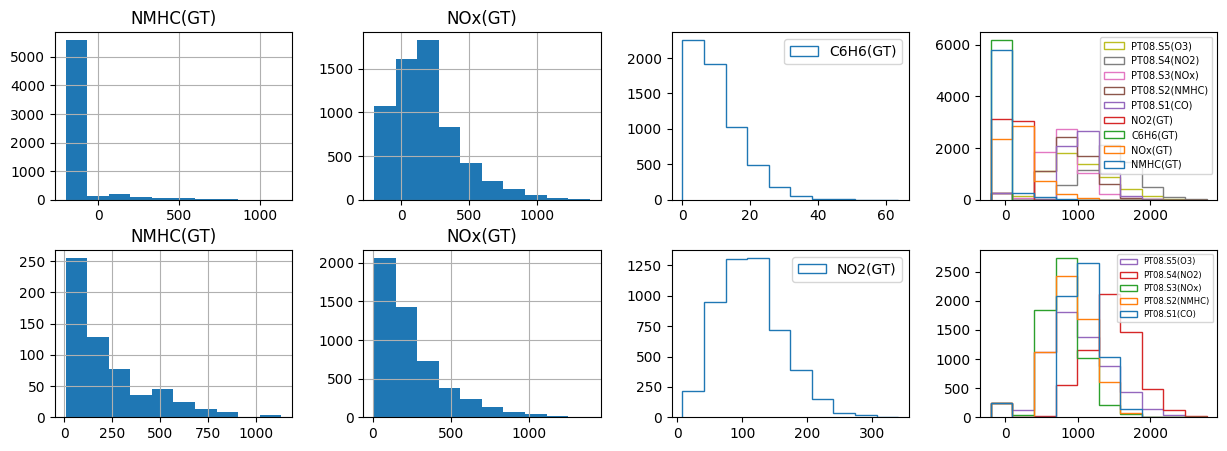

In [9]:
# we accidentally did this above, so lets try to clean it up
fig , axes = plt.subplots(
    nrows=2,
    ncols=4,
    figsize=(15,5))
# NMHC and NOx : [0,0]-[1,1]
train.hist(column='NMHC(GT)', ax=axes[0,0])
train.hist(column='NOx(GT)', ax=axes[0,1])
nmhcI = train['NMHC(GT)']>-200 # index (assumed) non-erroneous data
noxI = train['NOx(GT)']>-200
# axes[1,0].boxplot([train[nmhcI]['NMHC(GT)'],train[noxI]['NOx(GT)']], labels=['NMHC(GT)','NOx(GT)'])
# axes[1,1].hist(train[noxI]['NOx(GT)'])
train[nmhcI].hist(column='NMHC(GT)', ax=axes[1,0])
train[noxI].hist(column='NOx(GT)', ax=axes[1,1])

# train.hist(column=['C6H6(GT)','NO2(GT)','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'], stacked=True, edgecolor=['b','c','g','k','m','r','y'], facecolor='none', ax=axes[0,2])
axes[0,3].hist(train[['NMHC(GT)','NOx(GT)','C6H6(GT)','NO2(GT)','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']], label=['NMHC(GT)','NOx(GT)','C6H6(GT)','NO2(GT)','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'], histtype='step')#stacked=True, facecolor='none')
axes[0,3].legend(fontsize=7)
axes[1,3].hist(train[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']], label=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'], histtype='step')#stacked=True, facecolor='none')
axes[1,3].legend(fontsize=6)

c6h6 = train.loc[train['C6H6(GT)']>-200,['C6H6(GT)']]
axes[0,2].hist(c6h6, label='C6H6(GT)', histtype='step')
axes[0,2].legend(fontsize=10)
no2 = train.loc[train['NO2(GT)']>-200,['NO2(GT)']]
# no2 = train[['NO2(GT)']]
axes[1,2].hist(no2, label='NO2(GT)', histtype='step')
# axes[1,3].hist(train[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']], label=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'], histtype='step')#stacked=True, facecolor='none')
axes[1,2].legend(fontsize=10)
# 
plt.show()

NMHC Subplot[0,0]<br>
&emsp;Most values are below 0 as we saw in the boxplots above, the adjusted histogram with these points removed is at Subplot[1,0]<br>
&emsp;This likely indicates an error in data collection, and doesn't explain anything<br>
&emsp;In the adjusted graph, we see the data is heavily skewed towards lower values closer to 0, are generally up to 500, but outliers exist much higher 750-1000<br>
NOx Subplot[0,1]<br>
&emsp;While there are far less -200 values for NOx, we know from the earlier boxplots that they were not marked as outliers and therefore affect the way the data is displayed<br>
&emsp;Again, I indexed values greater than -200 to remove the stacked outliers for the adjusted NOx at Subplot[1,1]<br>
&emsp;In the adjusted graph, we see the data is heavily skewed towards lower values closer to 0, are generally up to 700, but outliers exist much higher up to 1500<br>
C6H6 Subplot[0,2]<br>
&emsp;the data is heavily skewed towards lower values closer to 0, generally up to 20, but outliers exist up to 50<br>
NO2 Subplot[1,2]<br>
&emsp;NO2 has the same number as -200 values as NOx, since they were marked outliers they are not connected to the graph and disrupt the scale<br>
&emsp;these values were removed in the plot for the same reasons as NMHC and NOx<br>
&emsp;As a result (and the nature of the dataset), the scale of the x-axis is smaller and needs to be put on its own plot<br>
&emsp;NO2 is also the only left-skewed histogram that doesn't peak at the minimum bin, and it peaks around 75~125μg/m^3<br>
All Histograms Subplot[0,3]<br>
&emsp;All histograms on the same plot<br>
All Sensor Histograms (S1-S5) Subplot[1,3]<br>
&emsp;All sensor histograms are normally distributed with slightly varying means and standard deviations<br>
&emsp;the -200 points are visible, but not weighted<br>
&emsp;$Height: S3<S1<S2<S4<S5$<br>
&emsp;$StDev: 320 = S3<S1<S2<S5<S4 = 466$<br>
&emsp;$Mean: 789 = S3<S2<S5<S1<S4 = 1400$

2. Pick 2 features and create a scatter plot to plot a correlation between them. Is there a high correlation?<br>
&emsp;seaborn had a really cool function pairplot() that we saw in the week 2 discussion<br>
&emsp;DataFrame.pariplot() makes scatterplots of every combination of features with histograms on the subplots comparing the same features<br>
&emsp;<br>
&emsp;I chose C6H6xS5 because it looked very tight and very correlated. I forgot that C6H6 has a tight scale, but even after restricting the x-axis to fit C6H6 the correlation remains high but visually the standard error looks wider<br>
&emsp;The S2 and C6H6 graphs look the most correlated.

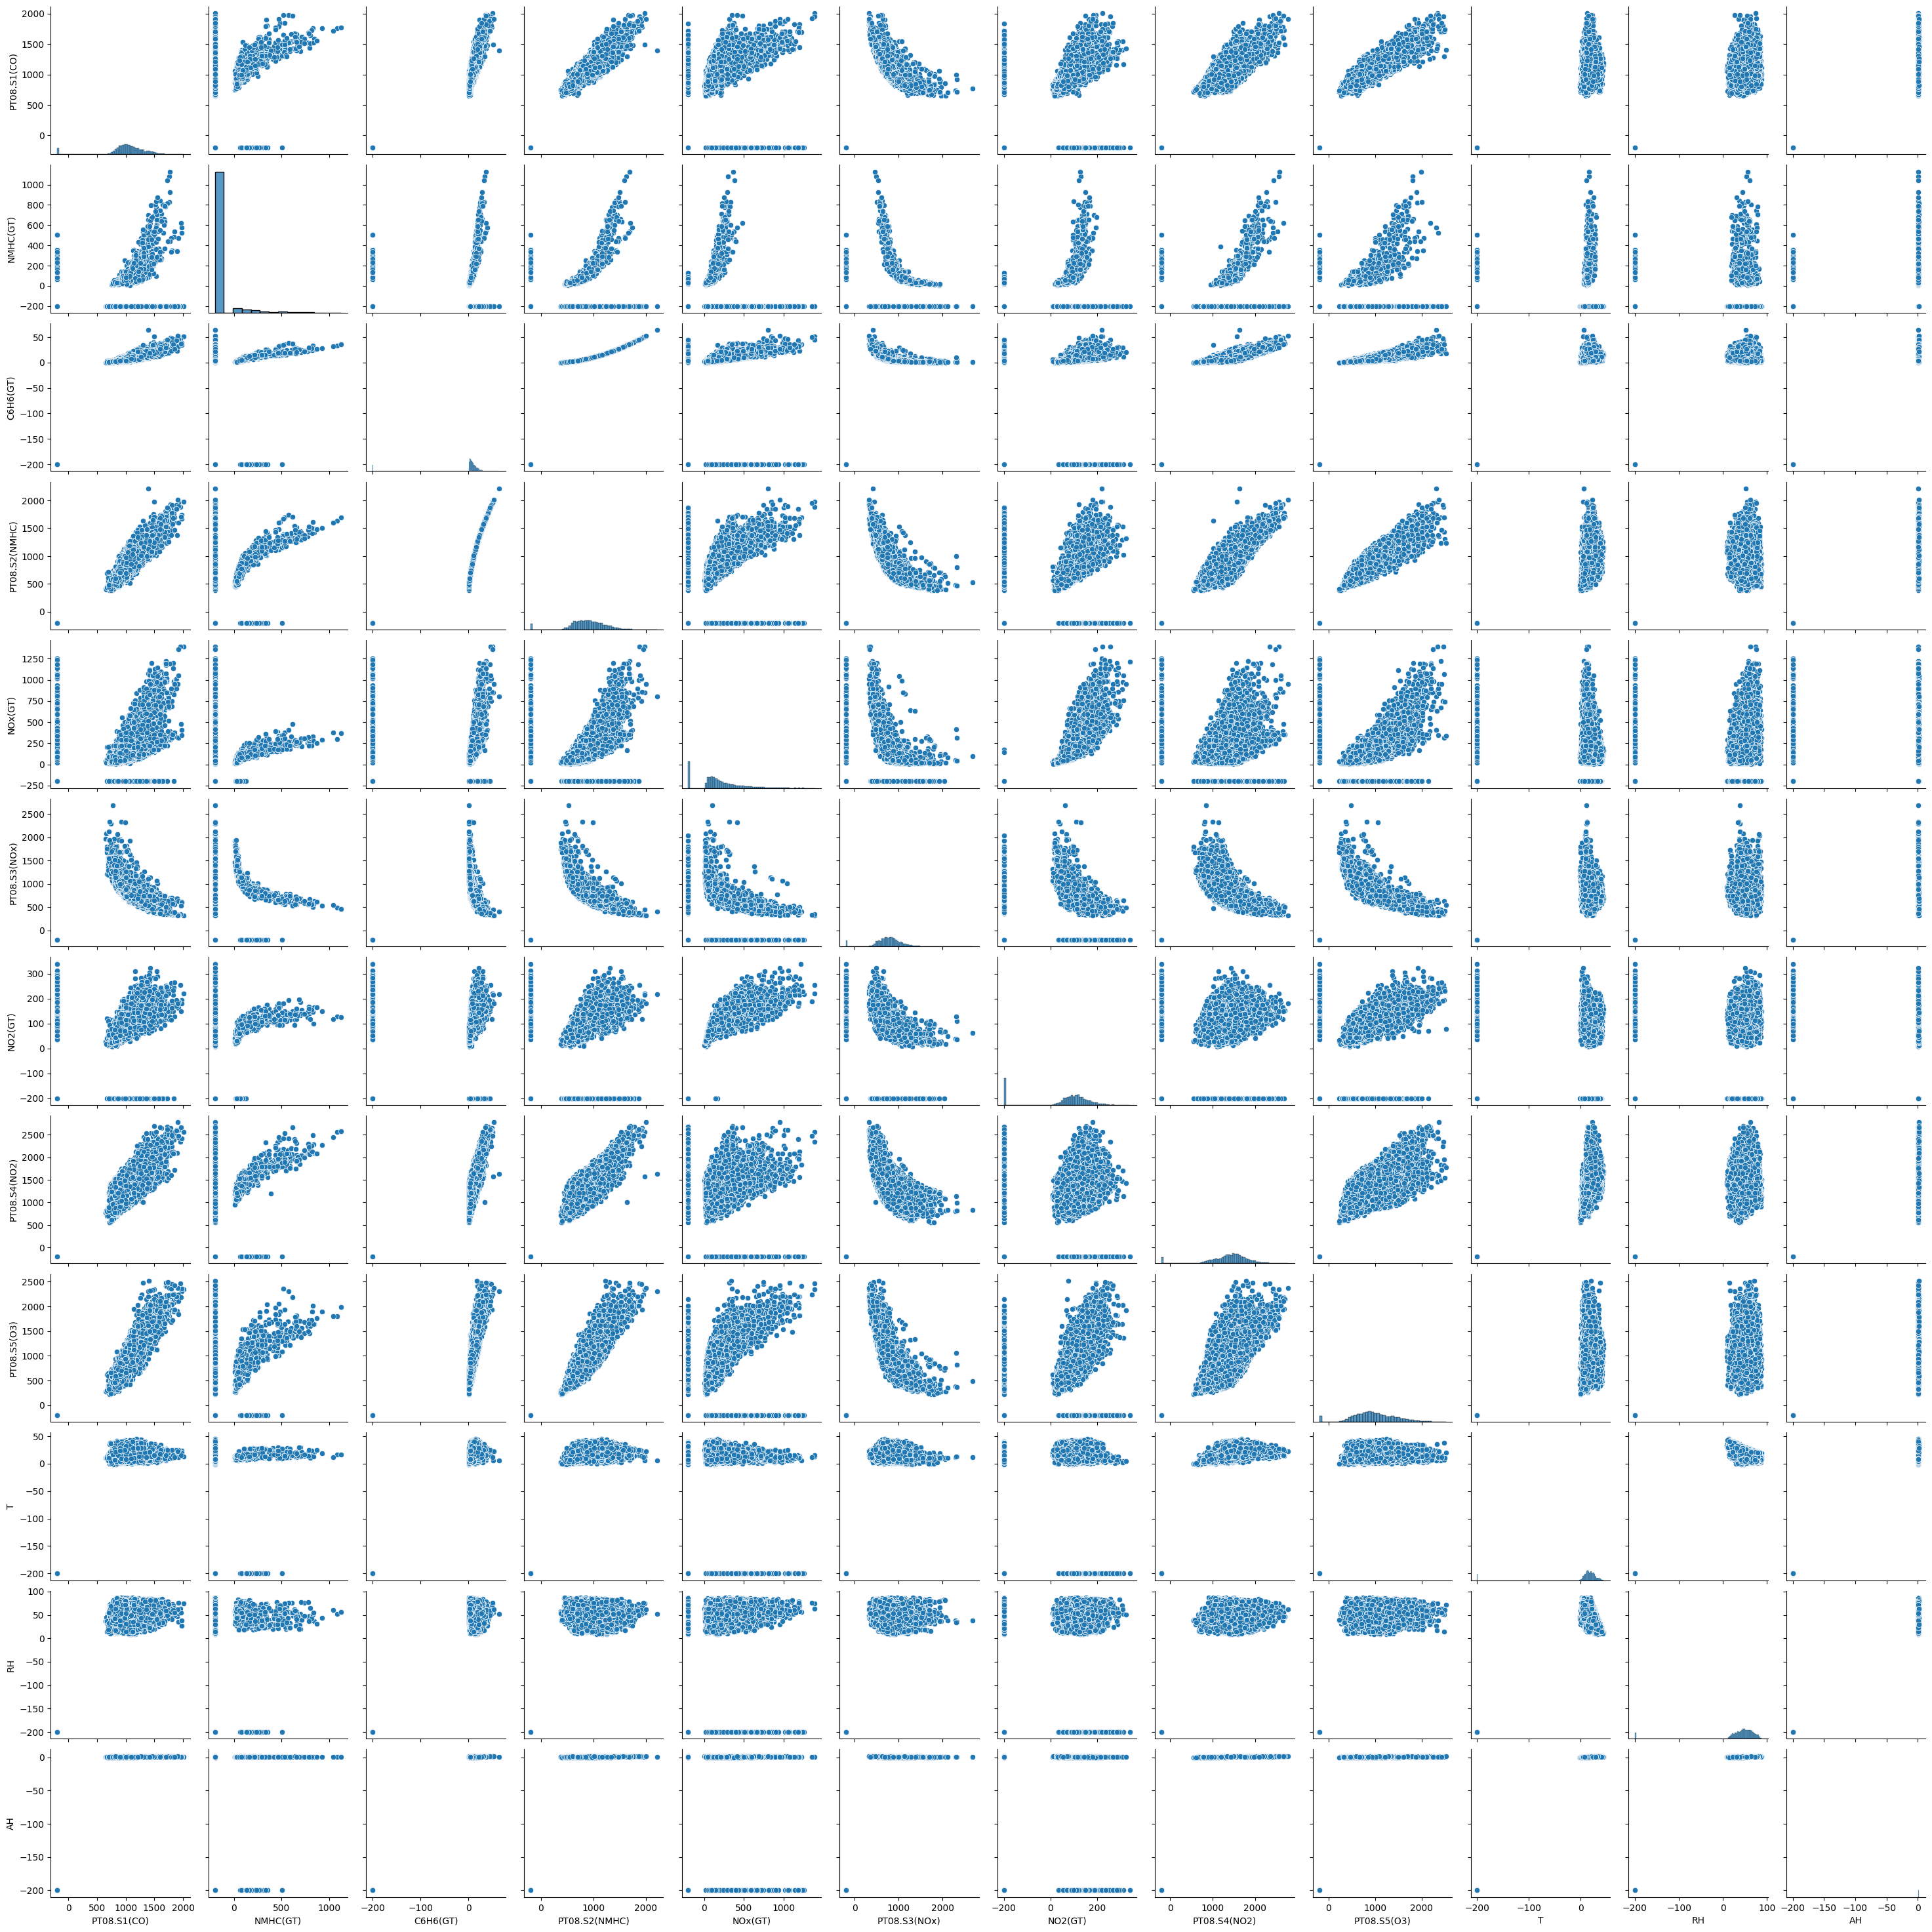

In [10]:
import seaborn as sns
sns.pairplot(train)
plt.show()

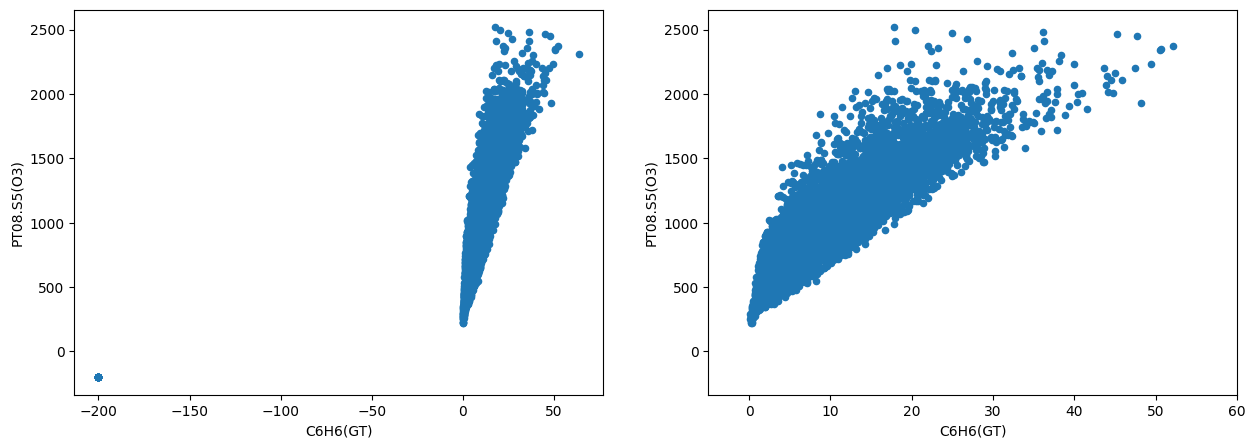

In [11]:
fig , axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(15,5))
train.plot.scatter('C6H6(GT)','PT08.S5(O3)',ax=axes[0])
train.plot.scatter('C6H6(GT)','PT08.S5(O3)',ax=axes[1])
axes[1].set_xlim(-5,60)
plt.show()

3. Compute the Pearson’s correlation between all pairs of variables 1-12. Assign the resulting correlation values in a 12x12 matrix C, whose (i; j) element represents the correlation value between variables i and j, i.e., C(i; j) = corr(i; j). Visualize the resulting matrix C with a heatmap and discuss potential associations between the considered variables. Note: You can use the ‘heatmap’ function from ‘seaborn’

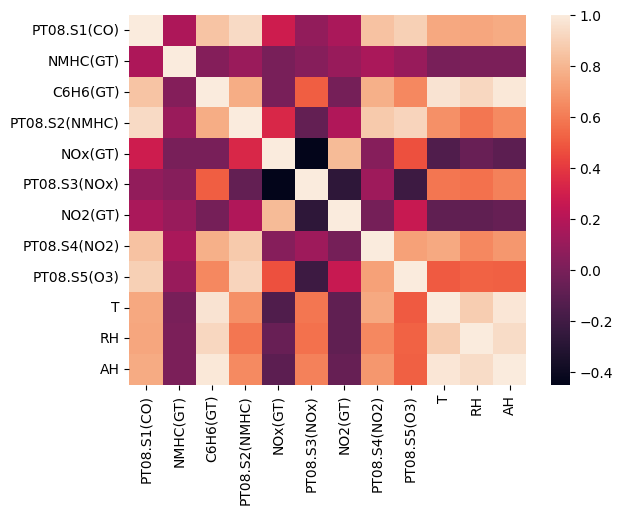

In [12]:
import math
import numpy as np
pear = []
pear_xlabels = []
pear_ylabels = []
ylab=True
for i, var1 in enumerate(train.columns):
    var1_nan = train[var1].isna()
    # print(f'/// nan {(print(var1_nan[170:180]))}')
    av1=train[var1].mean()
    pear.append([])
    pear_xlabels.append(var1)
    for j, var2 in enumerate(train.columns):
        var2_nan = train[var2].isna()
        av2=train[var2].mean()
        num = 0
        denomx = 0
        denomy = 0
        for k in train[var1].index:
            # print(f'/// {len(train[var1])}')
            # print(f'//// {k}')
            # if var1_nan[k] or var2_nan[k]: continue
            x = train[var1][k]-av1
            y = train[var2][k]-av2
            num += x*y
            denomx += x**2
            denomy += y**2
        # print(f'{num},{type(num)}')
        # print('---------------')
        # print(f'sqrt({denomx}*{denomy})')
        pear[i].append(num/math.sqrt(denomx*denomy))
        # print(f'{var1} x {var2} = {pear[i][j]}\n')
        if ylab:
            pear_ylabels.append(var2)
    ylab=False
### print pear table ###
# for i, y in enumerate(pear_ylabels):
#     print(f'{y}{' '*(15-len(y))}',end='')
#     print(pear[i])
# print(pear_xlabels)
ax = sns.heatmap(pear)
ax.set_xticklabels(pear_xlabels,rotation=90)
ax.set_yticklabels(pear_ylabels,rotation=0)
plt.show()


sensors are very correlated to eachother exempt S3 (they likely operate similarly) and are somewhat correlated to the T,RH,AH<br>
C6H6 is very correlated to the T,RH,AH<br>
NOx, NO2, and NMHC are somewhat inversely correlated to T,RH,AH<br>
NMHC either [not correlated with] or [somewhat negatively correlated with] every other feature<br>
S1 is highly correlated with C6H6<br>
S2 is most correlated with C6H6<br>
S3 is negatively correlated with NOx around the same degree that S1 and S2 are positively (~0.4), but S3 is also n-corr with NO2 to the same degree<br>
S4 is fairly correlated with C6H6<br>
S5 is most correlated with NMHC and C6H6<br>
<br>
C6H6 showing up highly correlated with most things is likely erroneous since we have stated problems with the label previously. <br>

# (c) Linear Regression Implementation
Implement a linear regression model from scratch to regress the target variable, Carbon monoxide (CO)

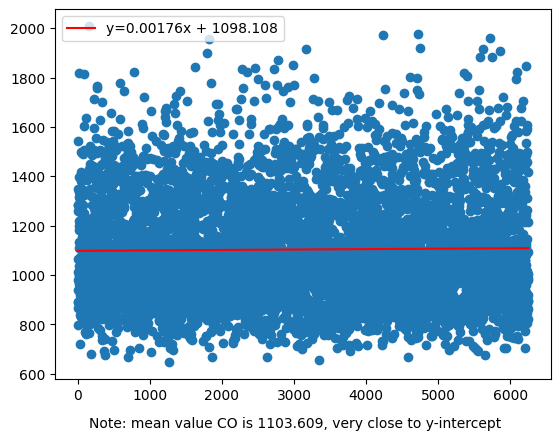

In [13]:
co = pd.DataFrame({
        'CO':train.loc[train['PT08.S1(CO)']>-200,'PT08.S1(CO)'],
        'iCO':train.index[train['PT08.S1(CO)']>-200] # I realized later that the index will carry over
    })
# co['CO'] = train.loc[train['PT08.S1(CO)']>-200,'PT08.S1(CO)']
# co['iCO'] = train.index[train['PT08.S1(CO)']>-200]
plt.scatter(co['iCO'],co['CO'])

# vvv formulas from lecture vvv
# b0 = ymean - b1 xmean
# b1 =(sum((xi-xmean)(yi-ymean))/sum(xi-xmean)**2)
# x:iCO, y:CO
num = 0
denom = 0
xmean = co['iCO'].mean()
ymean = co['CO'].mean()
for index, row in co.iterrows():
    x = row['iCO']
    y = row['CO']
    num += (x-xmean)*(y-ymean)
    denom += (x-xmean)**2
b1 = num/denom
b0 = ymean - b1*xmean

x = np.linspace(0,6250)
y = b1*x + b0
plt.plot(x,y, 'r', label=f'y={round(b1,5)}x + {round(b0,3)}')
plt.figtext(0.5, 0.01, f'Note: mean value CO is {round(ymean,3)}, very close to y-intercept', ha="center", fontsize=10)
plt.legend()
plt.show()

### Whole training data set
This is a linear regression model on PT08.S1(CO) over each hour data was collected. The regression provides a very horizontal line because the data isn't trending anywhere, it continues to have the similar values through the whole dataset. This would make sense since each datapoint is the hourly average CO sensor response.

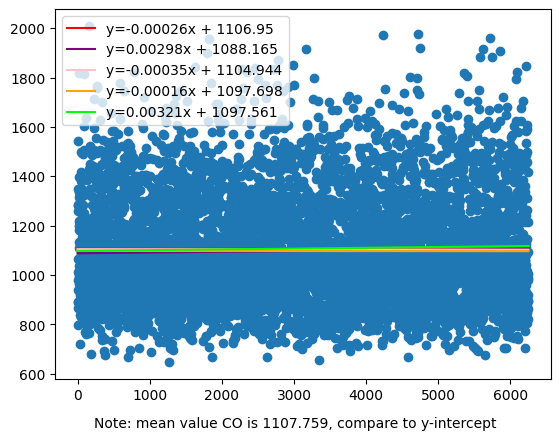

In [14]:
co = pd.DataFrame({
        'CO':train.loc[train['PT08.S1(CO)']>-200,'PT08.S1(CO)'],
        'iCO':train.index[train['PT08.S1(CO)']>-200] # I realized later that the index will carry over
    })
# co['CO'] = train.loc[train['PT08.S1(CO)']>-200,'PT08.S1(CO)']
# co['iCO'] = train.index[train['PT08.S1(CO)']>-200]
plt.scatter(co['iCO'],co['CO'])

# vvv formulas from lecture vvv
# b0 = ymean - b1 xmean
# b1 =(sum((xi-xmean)(yi-ymean))/sum(xi-xmean)**2)
# x:iCO, y:CO
b0 = []
b1 = []
data = [co.sample(1500),co.sample(1500),co.sample(1500),co.sample(1500),co.sample(1500)]
for d in data:
    xmean = d['iCO'].mean()
    ymean = d['CO'].mean()
    num = 0
    denom = 0
    for index, row in d.iterrows():
        x = row['iCO']
        y = row['CO']
        num += (x-xmean)*(y-ymean)
        denom += (x-xmean)**2
    b1.append(num/denom)
    b0.append(ymean - b1[-1]*xmean)

colors = ['r','purple','pink','orange','lime']
x = np.linspace(0,6250)
for i in range(len(b0)):
    y = b1[i]*x + b0[i]
    plt.plot(x,y, colors[i], label=f'y={round(b1[i],5)}x + {round(b0[i],3)}')
plt.figtext(0.5, 0.01, f'Note: mean value CO is {round(ymean,3)}, compare to y-intercept', ha="center", fontsize=10)
plt.legend()
plt.show()

### 5 1500 training datapoint samples
Using a random sample of 1500 datapoints allows us to calculate a slope and y-intercept that should represent the data as a whole. Repeating this 4 more times (with replacement) lets us compare the samples to ensure that they are consistent. 

Every time this block is run, new samples are taken, and therefore new regressions are made by calculating new slopes and y-intercepts. They should all look very similar to the one made by the whole dataset. You will see that sometimes slopes are slightly negative rather than slightly positive, and that is due to random sampling. Every sample still returns very horizontal lines with a y-intercept near the true mean.

observed y-intercepts were between [1085,1124]<br>
observed slopes were between [-0.0052,0.0062]

While this was good practice for making a linear regression, this is clearly a bad feature to use ro predict target values.

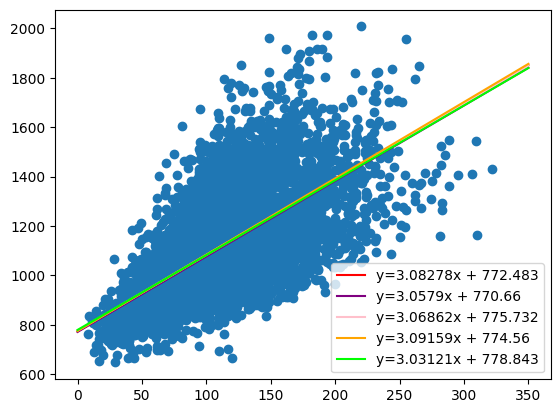

In [15]:

cono = train.loc[(train['PT08.S1(CO)']>-200) & (train['NO2(GT)']>-200) & (train['NOx(GT)']>-200) & (train['PT08.S5(O3)']>-200),['PT08.S1(CO)','NO2(GT)','NOx(GT)','PT08.S5(O3)']]
# co['CO'] = train.loc[train['PT08.S1(CO)']>-200,'PT08.S1(CO)']
# co['iCO'] = train.index[train['PT08.S1(CO)']>-200]
plt.scatter(cono['NO2(GT)'],cono['PT08.S1(CO)'])

# vvv formulas from lecture vvv
# b0 = ymean - b1 xmean
# b1 =(sum((xi-xmean)(yi-ymean))/sum(xi-xmean)**2)
# x:iCO, y:CO
b0 = []
b1 = []
data = [cono.sample(1500),cono.sample(1500),cono.sample(1500),cono.sample(1500),cono.sample(1500)]
for d in data:
    xmean = d['NO2(GT)'].mean()
    ymean = d['PT08.S1(CO)'].mean()
    num = 0
    denom = 0
    for index, row in d.iterrows():
        x = row['NO2(GT)']
        y = row['PT08.S1(CO)']
        num += (x-xmean)*(y-ymean)
        denom += (x-xmean)**2
    b1.append(num/denom)
    b0.append(ymean - b1[-1]*xmean)

colors = ['r','purple','pink','orange','lime']
x = np.linspace(0,350)
for i in range(len(b0)):
    y = b1[i]*x + b0[i]
    plt.plot(x,y, colors[i], label=f'y={round(b1[i],5)}x + {round(b0[i],3)}')
plt.legend()
plt.show()

After removing -200 datapoints from the target and NO2 columns and sampling the same as before, we get 5 very similar looking lines to predict our target variable using NO2(GT)

We will use an average of these b0 and b1 values for our predictions.

# (e) Result Analysis - <br>Linear Regression
Perform a 5-fold cross validation. Compute RMSE for each validation set across 5 folds. Report average and standard deviation of RMSE values. Do you see a big change across different folds? How can you use the coefficient of this model to find the most informative features?

In [16]:
# root mean square err 5fold cross-vali
# RMSE = [0] * len(b0)
RMSE = np.zeros(len(b0))
for i in range(len(b0)):
    mean0 = np.array(b0[:i] + b0[i+1:]).mean()
    mean1 = np.array(b1[:i] + b1[i+1:]).mean()
    for index, row in data[i].iterrows():
        RMSE[i] += (row['PT08.S1(CO)'] - (row['NO2(GT)'] * mean1 + mean0))**2
        # print(row['PT08.S1(CO)'] , row['NO2(GT)'] * mean1 + mean0)
    RMSE[i] = np.sqrt(RMSE[i]/len(data[i]))
print(f'5-fold RMSE: \n\t{'\n\t'.join(str(x) for x in RMSE)}')
print(f'mean: {RMSE.mean()}\nstdev: {RMSE.std()}')

5-fold RMSE: 
	169.19286413213013
	167.7469211884501
	169.05638359969444
	170.3030139225424
	172.08599494931087
mean: 169.6770355584256
stdev: 1.4518888775922496


Performing 5-fold cross-validation on the data yields a mean of $165<u<170$ and standard deviationn of $σ<3$.

I would like to note again that this was done on 5 sets made of approximately .2~.25 of the whole training set (with replacement). The results were very good, a consistent mean and low standard deviation.

We could only get results this good from this kind of data partitioning because:
    1. the data is very correlated
    2. .2~.25 of the set is enough to be representative of the whole

While allowing replacement may mean a little overfitting to repeated points and lower rsmes, the small sample size coupled with very similar regressions (and calculating coeffs rather than GD) means I do trust this model to predict approximate CO sensor response based on average NO2 in the air.

Plugging our model's coefficients into rmse shows us how close it is to predicting actual values. For a dataset like CO with a mean 1117, std 220, we see that a mean rmse of 166.4 when using NO2 to predict values is fairly accurate. When looking for informative features, finding low rmse values are a good sign for a directly correlated feature.

Results are very good for a 1-feature linear approximation.

# (d) (20 points) Logistic Regression Implementation
Using the column PT08.S1(CO), create a binary label for this dataset where the values more than 1000 correspond to label 1 and the values less than or equal to 1000 correspond to label 0. Implement a logistic regression model from scratch to predict this binary label.

In [17]:
from scipy.special import expit, logit # Acknowledgement: Manoj said to use scipy's sigmoid function because it is more stable (and he is right)
class LogisticRegression_: # Acknowledgement: the rest of the LR code is from the Discussion 4 notebook
  def __init__ (self, D = 2, lr = 0.1, lambda_param = 0.1, max_iter = 1000):
    self.lr           = lr
    self.w            = np.random.randn(D + 1, 1)
    self.max_iter     = max_iter
    self.lambda_param = lambda_param
    self.coeffs       = dict() # store weights at select iterations

  def fit(self, X, y):
    n          = X.shape[0]
    X_extended = np.concatenate([X, np.ones((n, 1))], axis=1)

    for i in range(self.max_iter):
      logits = X_extended @ self.w
      grad    = ((expit(logits)-y) * X_extended).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w
      self.w -= self.lr * grad
      if i % 500 == 0 and i>=2000:
        self.iter = i
        # print(logits,'\n',self.w)
        self.coeffs[i] = self.w.copy()
        if (i % 2500 == 0) or (i % 3000 == 0) or (i % 4000 == 0): # 5fold print 3 graph but save weights at more iterations
          self.plot(X, y, self.predict(X))

  def predict(self, X):
    X_extended = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
    logits     = np.matmul(X_extended, self.w)
    return np.round(expit(logits))


  def plot(self, X, y, preds = None):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax_gt, ax_pred = ax

    ax_gt.scatter(X[:, 0], X[:, 1], c = y)
    ax_gt.set_title('GROUND TRUTH')
    ax_pred.scatter(X[:, 0], X[:, 1], c = preds)
    ax_pred.set_title('PREDS')
    fig.suptitle(f"ITERATION: {self.iter}", fontsize=30)
    plt.show()


In [18]:
cono['mill'] = cono['PT08.S1(CO)'].map(lambda x:1 if x>1000 else 0)
print(len(cono))
conormal = cono.copy(deep=True)
for index, row in conormal.iterrows(): # normalize data x-u/σ
    conormal.at[index, 'NO2(GT)'] = (row['NO2(GT)'] - cono['NO2(GT)'].mean()) / cono['NO2(GT)'].std()
    conormal.at[index, 'NOx(GT)'] = (row['NOx(GT)'] - cono['NOx(GT)'].mean()) / cono['NOx(GT)'].std()
    conormal.at[index, 'PT08.S5(O3)'] = (row['PT08.S5(O3)'] - cono['PT08.S5(O3)'].mean()) / cono['PT08.S5(O3)'].std()

4888


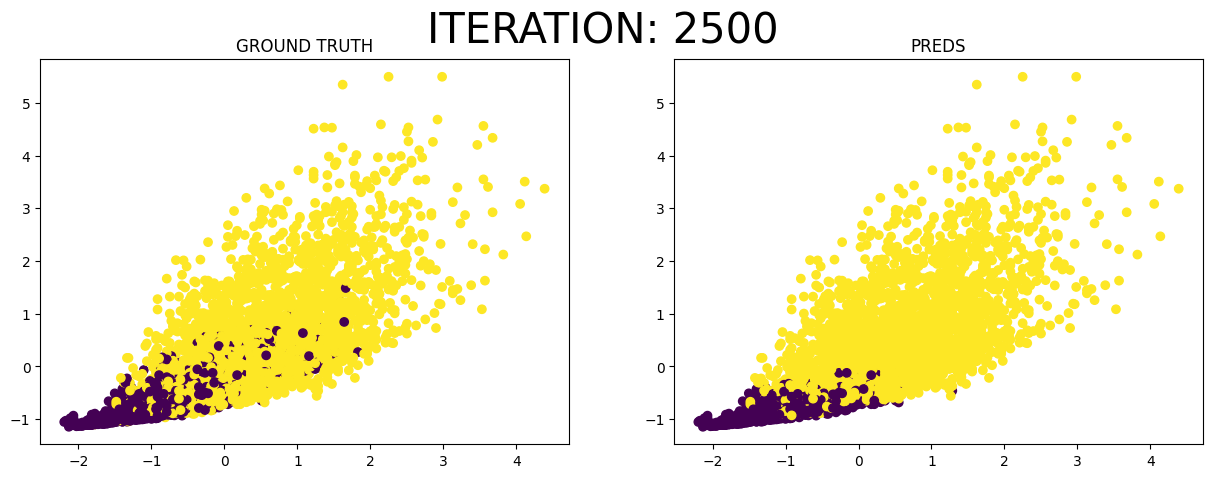

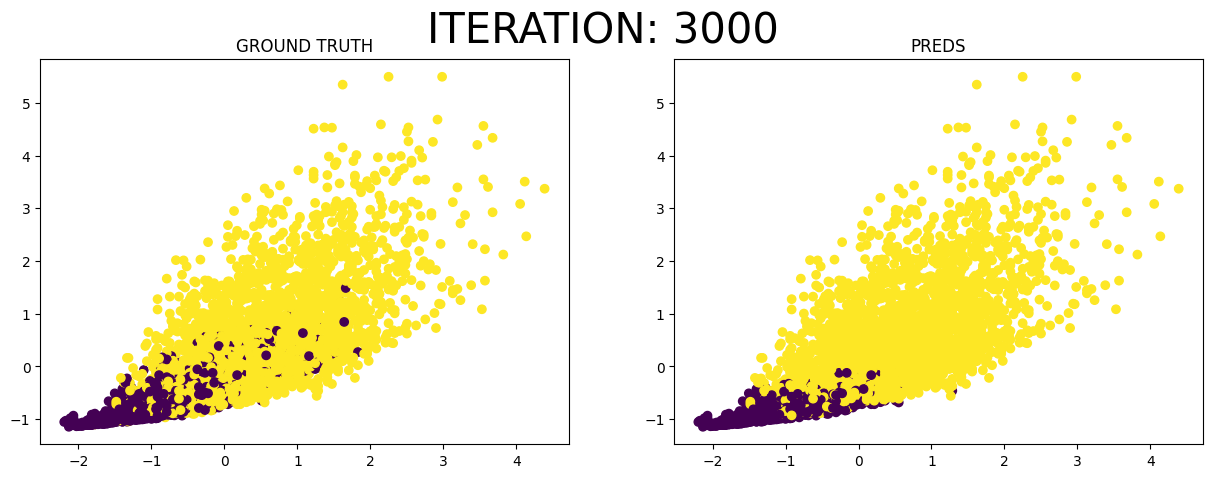

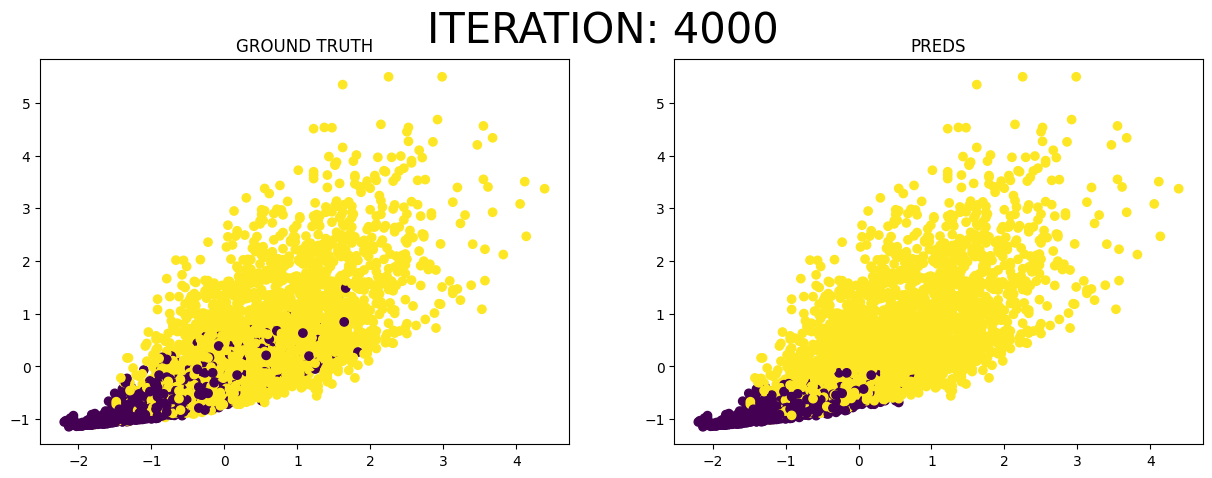

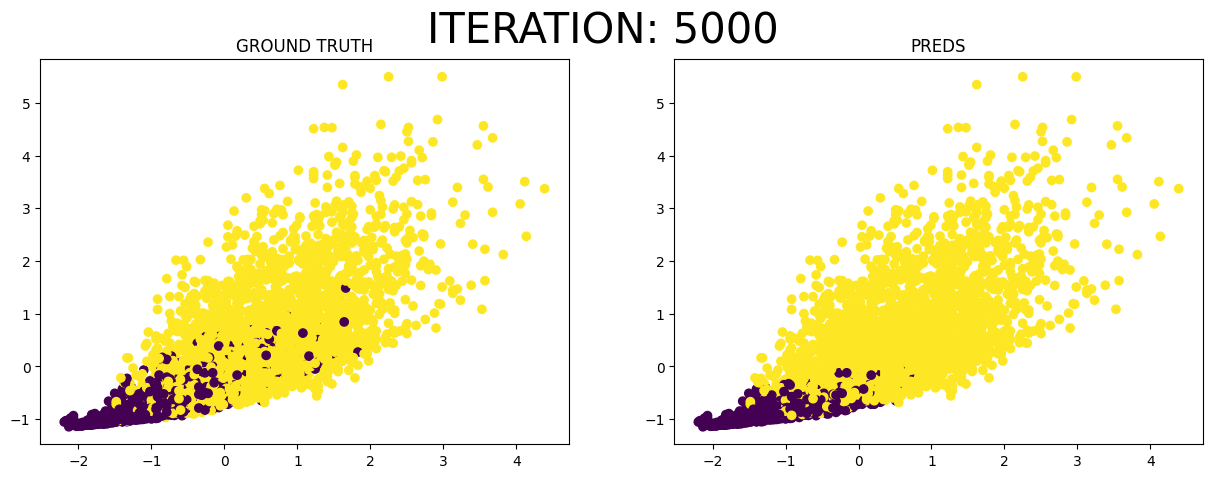

In [19]:
lr = LogisticRegression_(lr=0.01, D=3, lambda_param=0, max_iter=5001)
X = np.array(conormal[['NO2(GT)','NOx(GT)','PT08.S5(O3)']])
y = np.array([conormal['mill']]).T
lr.fit(X,y)

# (f) Result Analysis -<br> Logistic Regression
Perform a 5-fold cross validation. Compute accuracy, precision, recall, and F1 score for each validation set across 5 folds. Report the average and standard deviation of these metrics. Do you see a big change across different folds?

c:\Users\nick2\AppData\Local\Programs\Python\Python312\Lib\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Fold 1


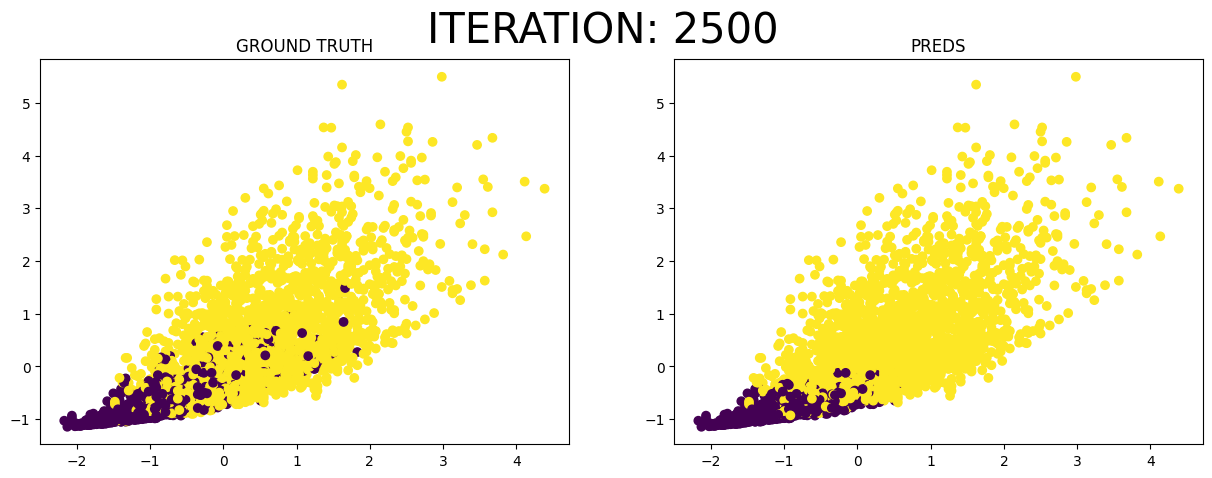

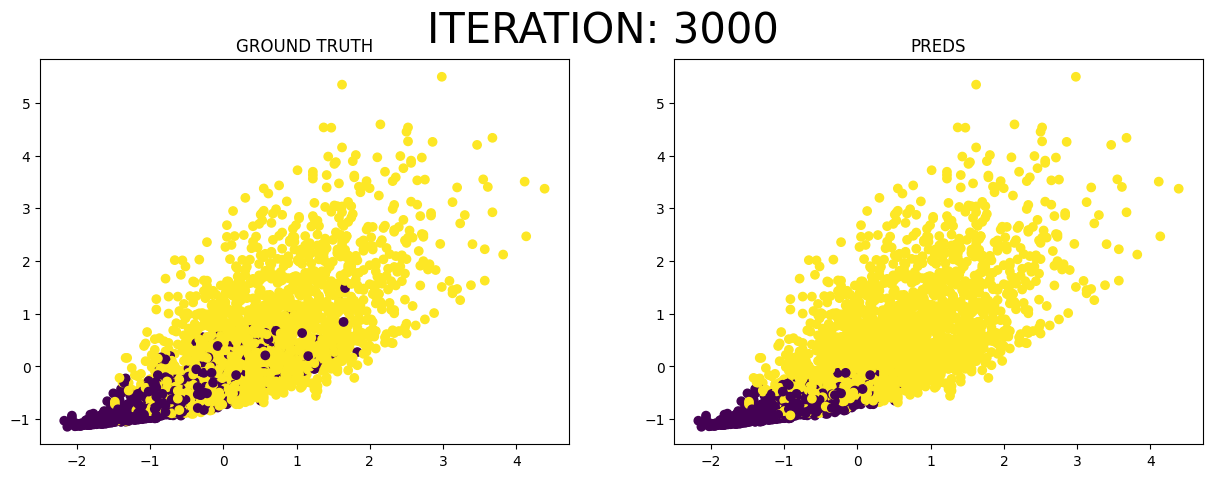

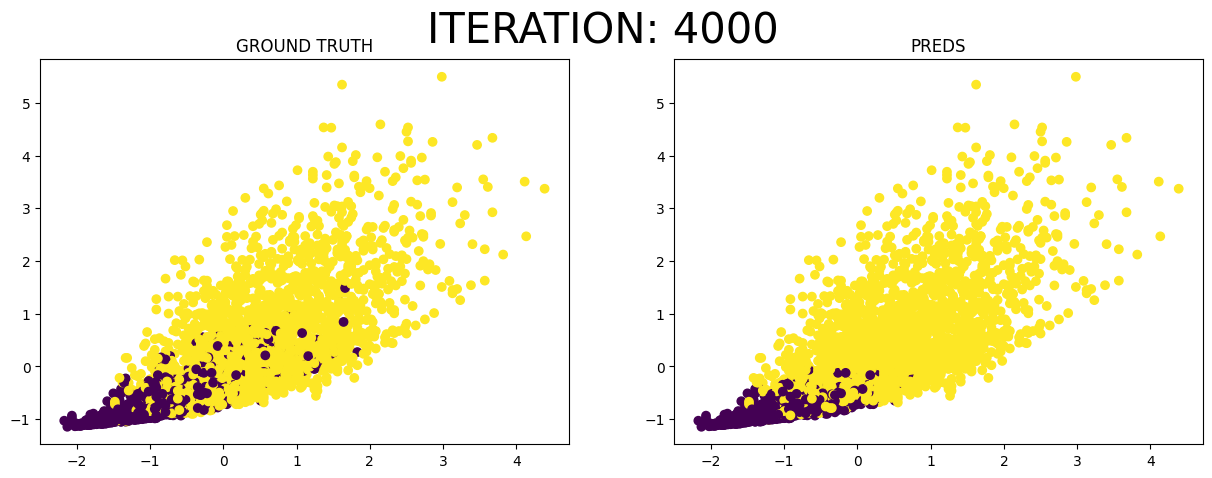

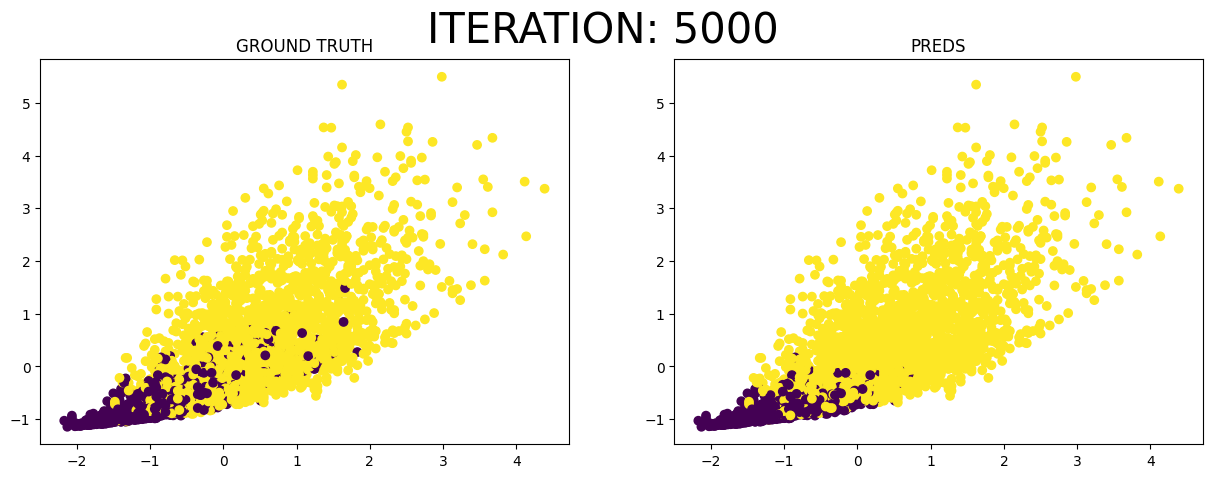

Fold 2


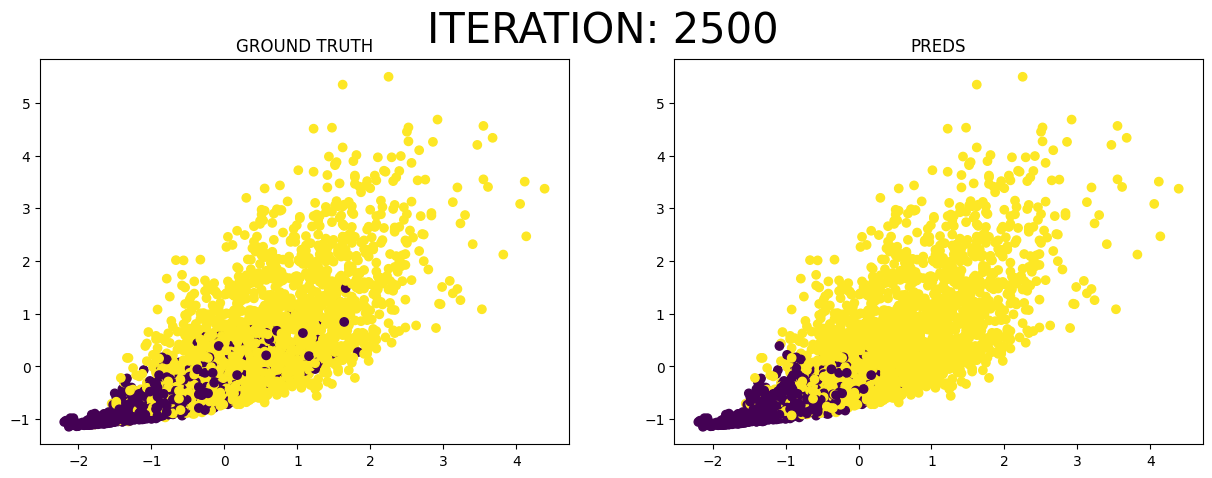

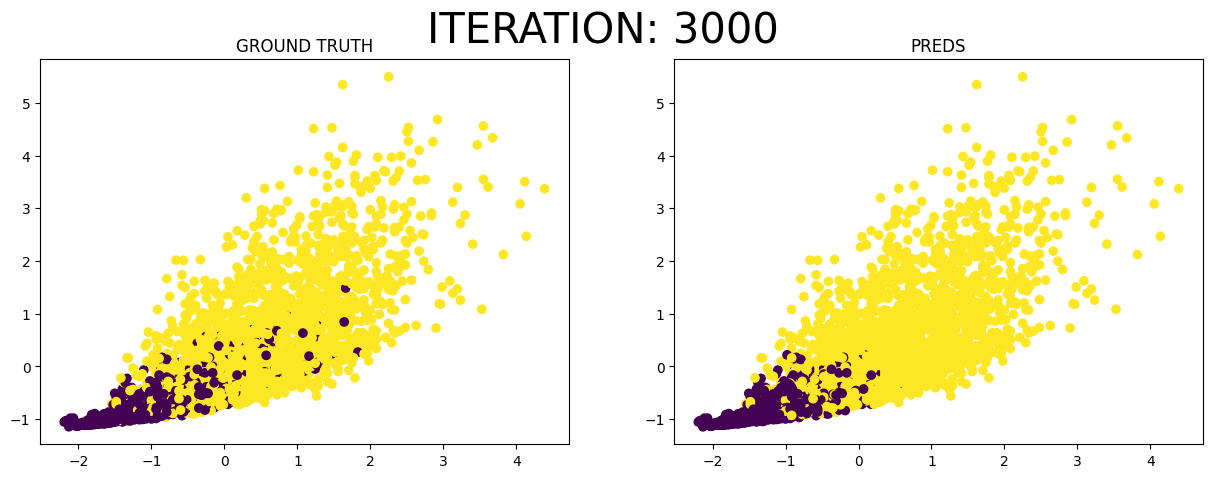

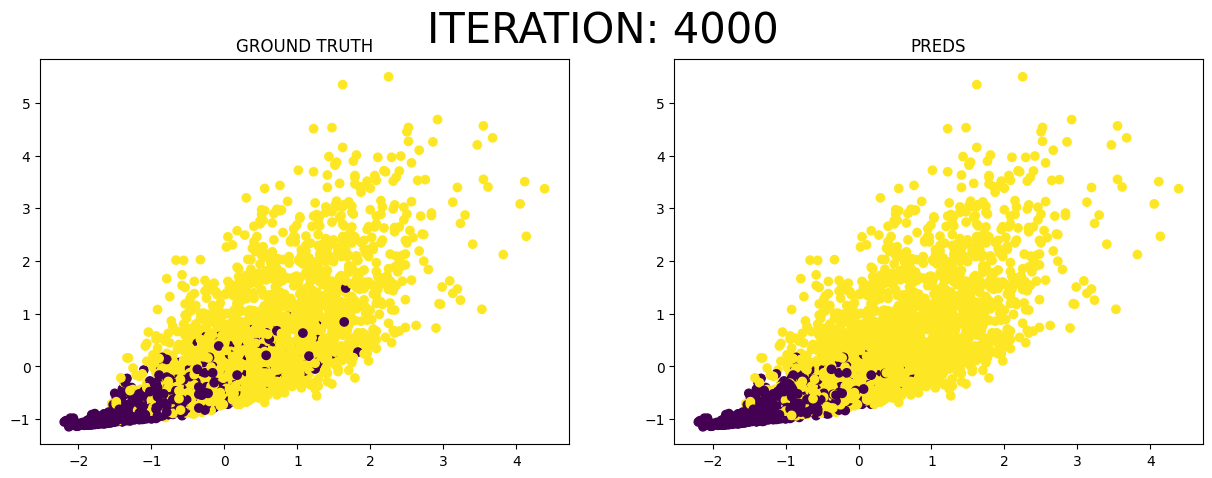

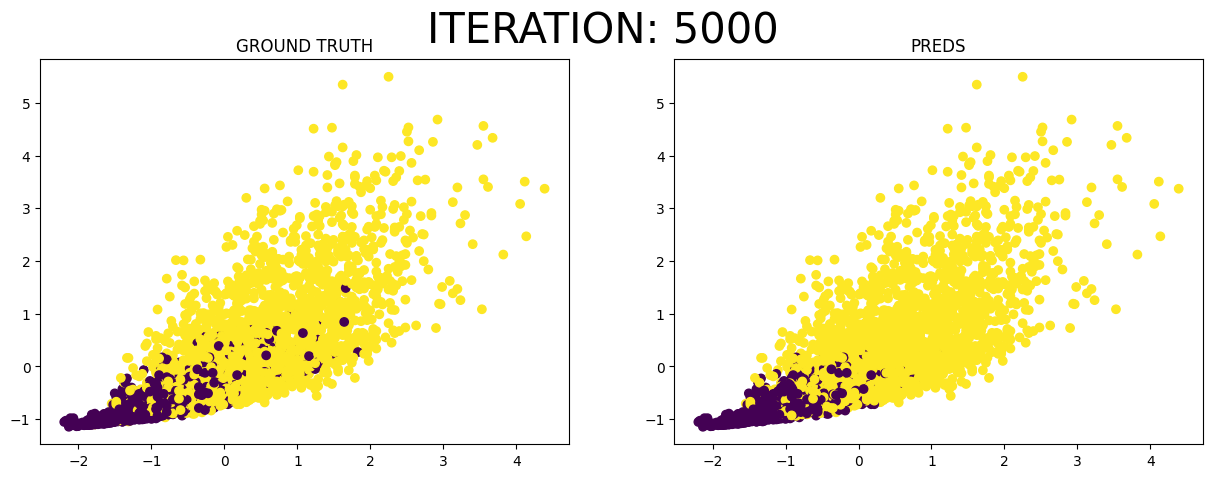

Fold 3


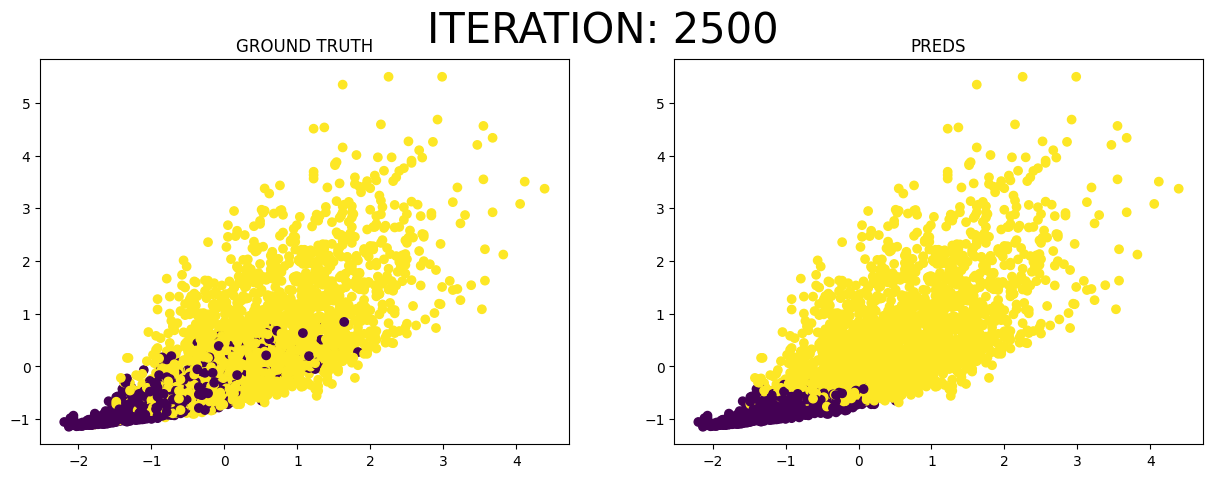

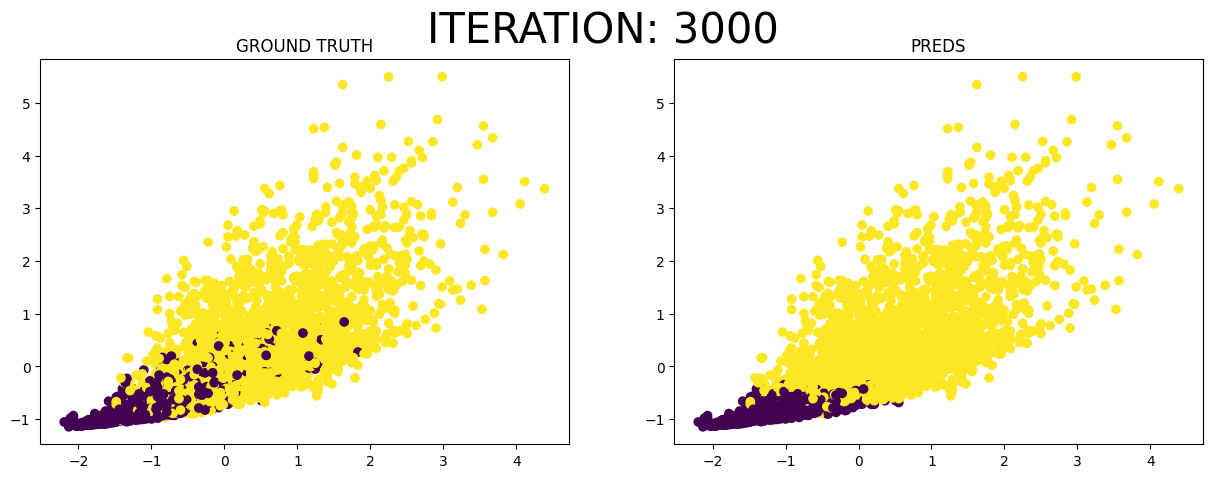

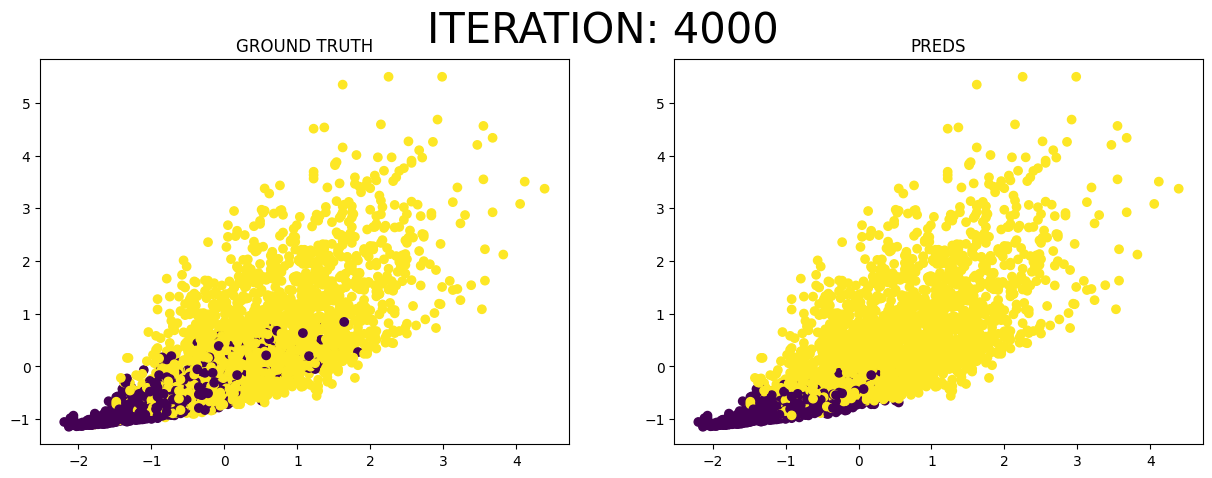

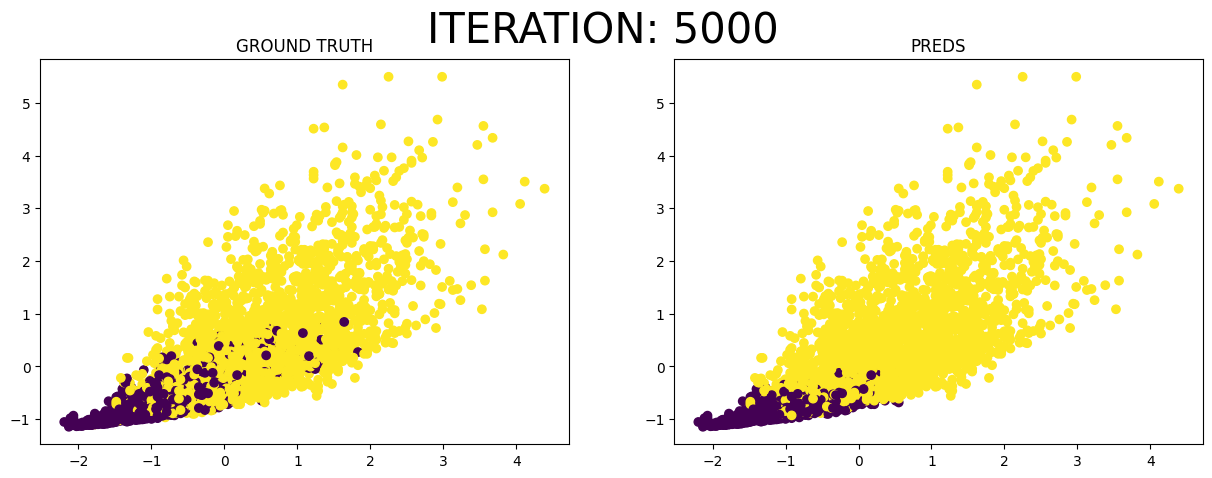

Fold 4


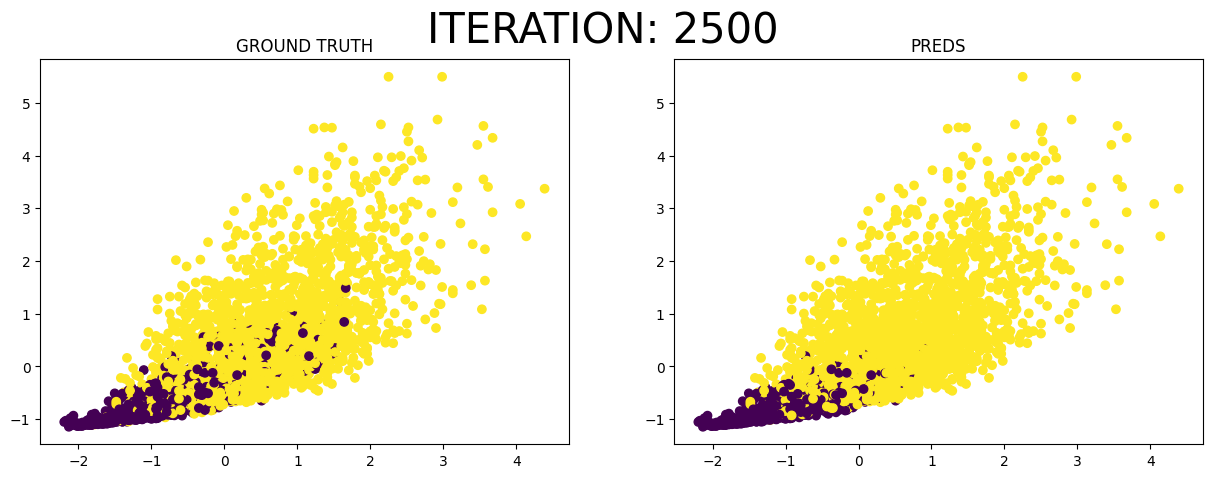

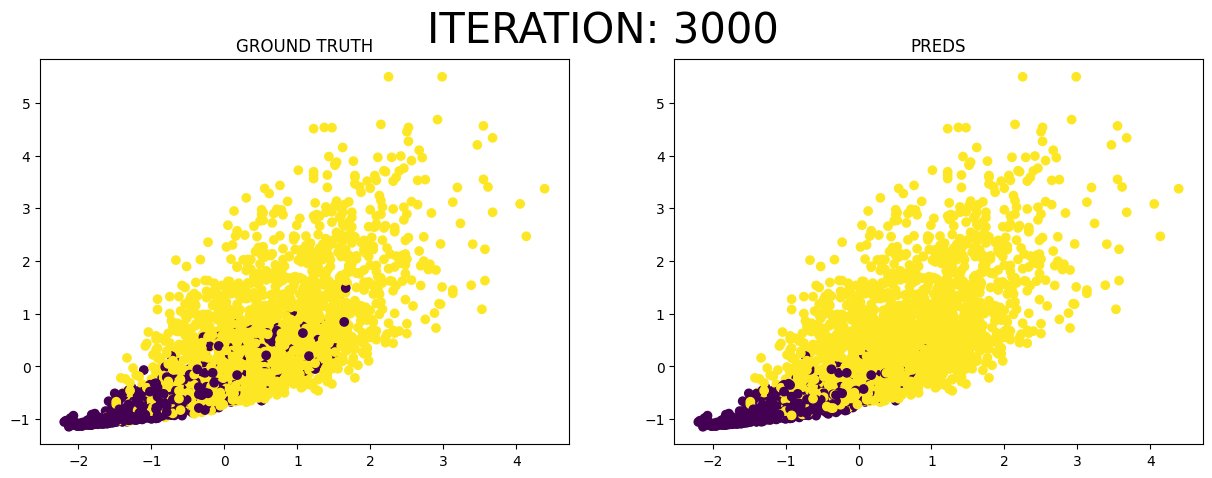

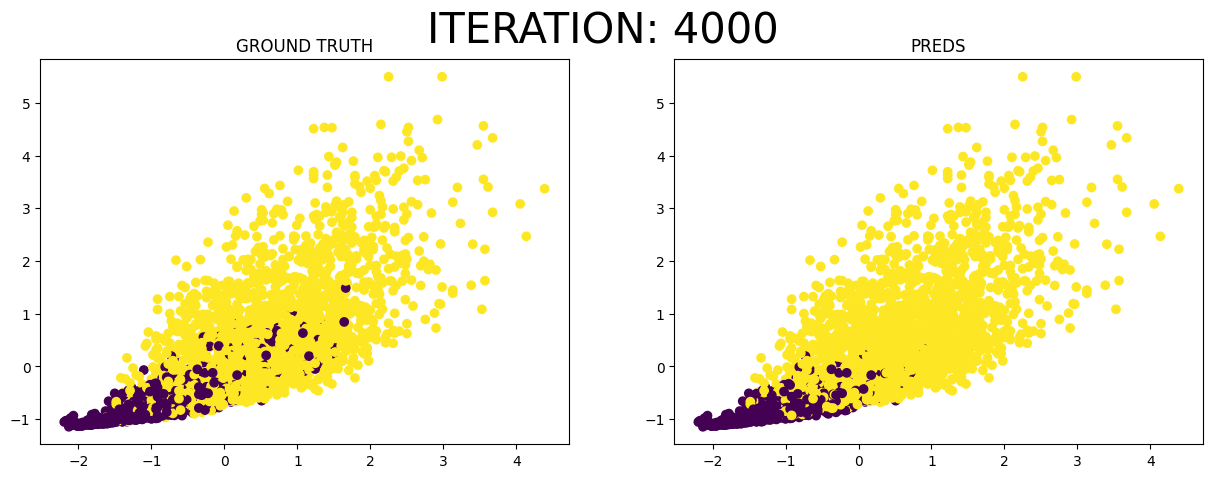

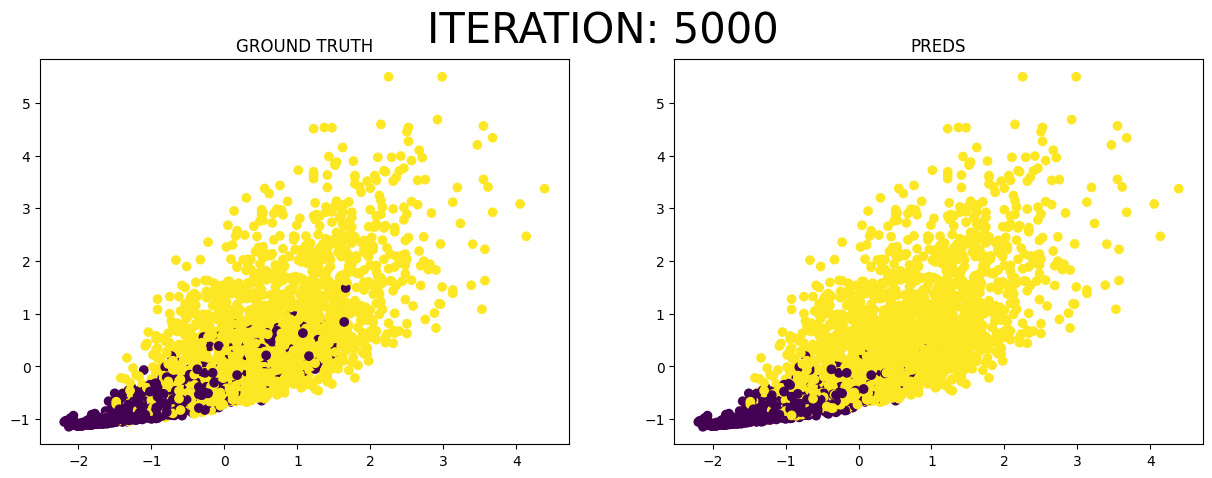

Fold 5


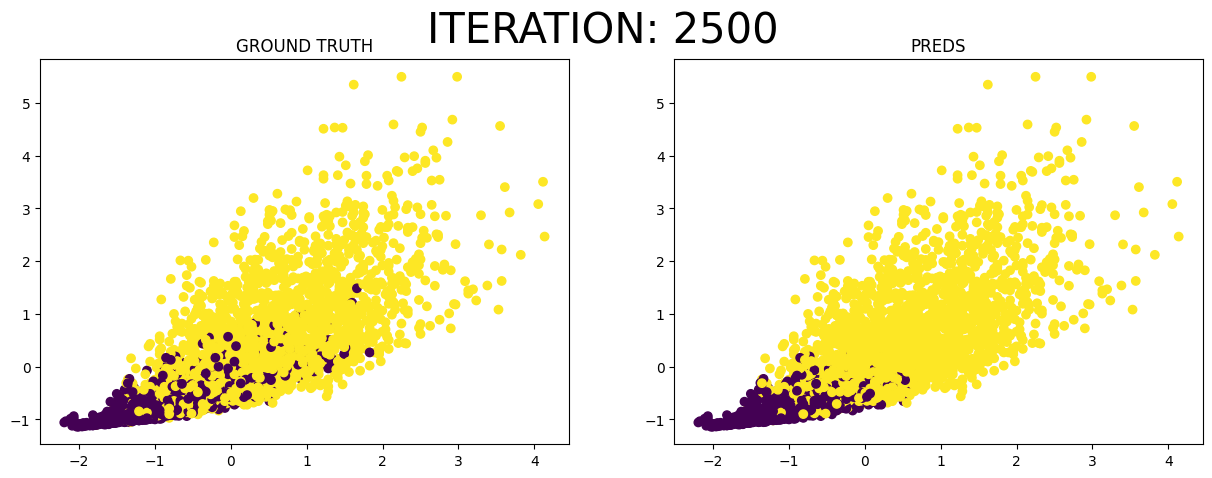

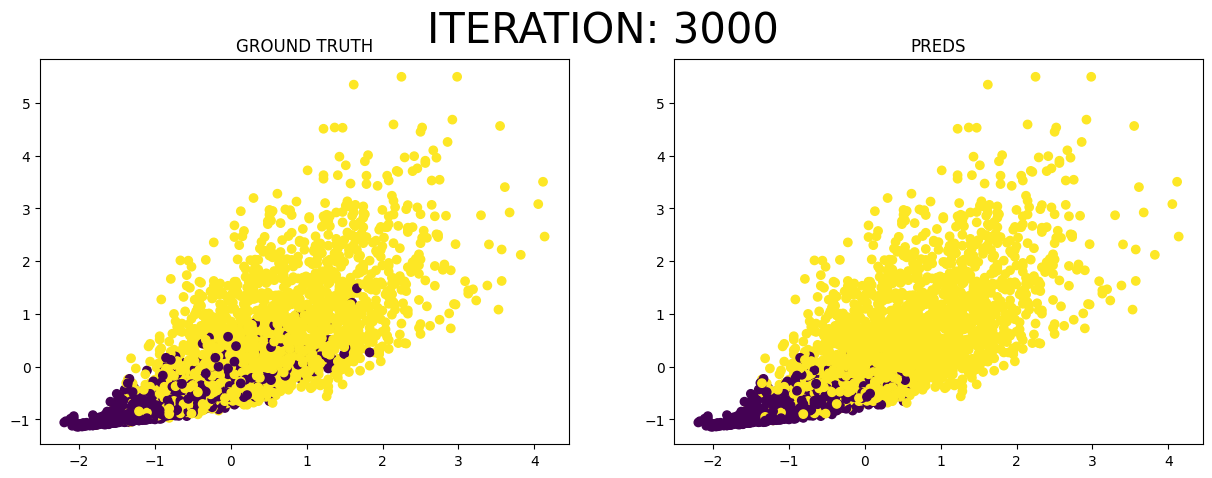

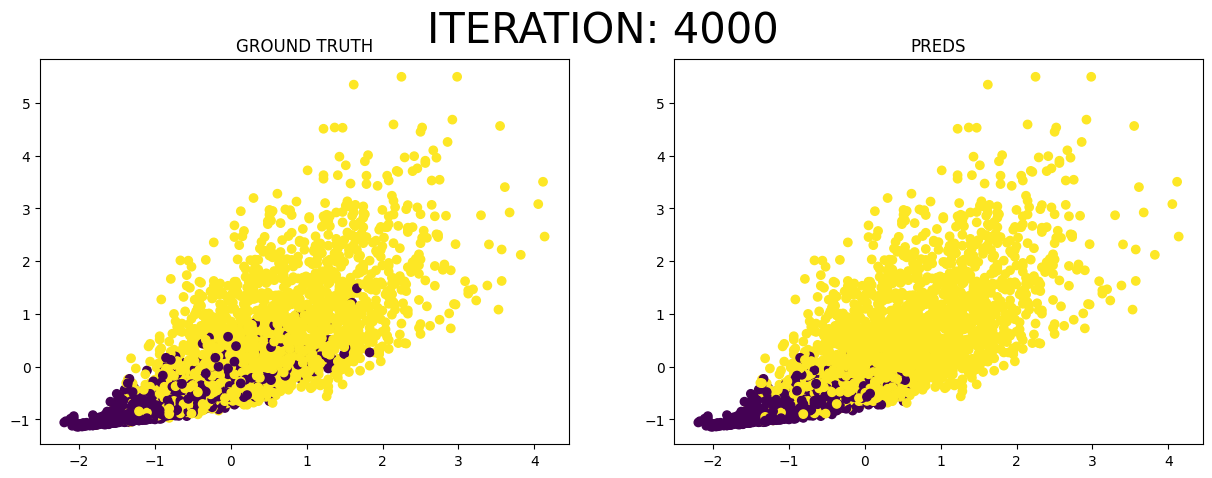

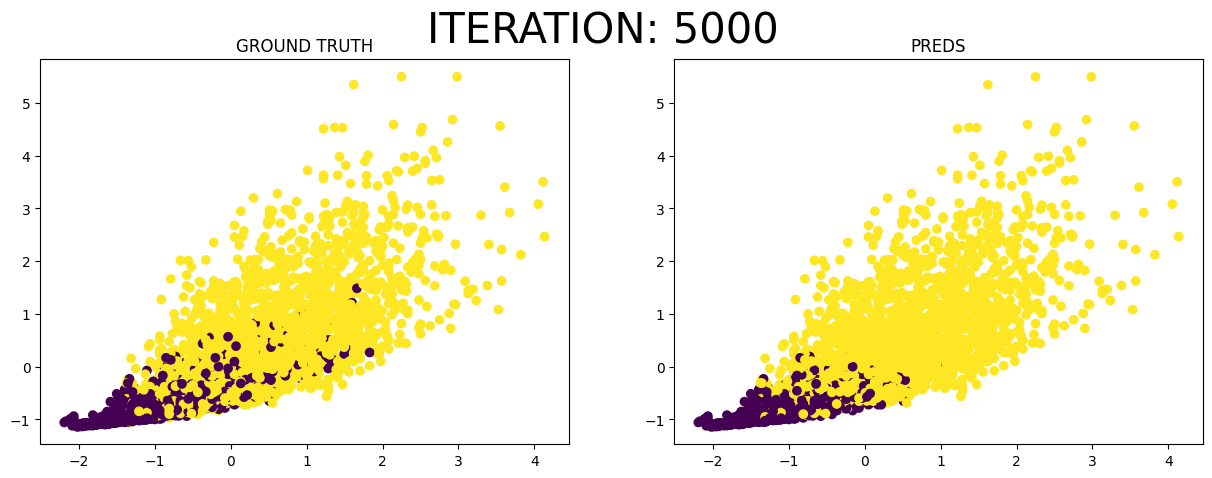

In [20]:
# spl = np.random.rand(len(conormal)) < 0.85 # Acknowledgement: stackoverflow to split data randomly
# print(f'full DF: {len(conormal)}')
# vali = conormal[~spl]
# print(f'vali: {len(vali)}')
# cono_train = conormal[spl]
# l = len(cono_train)
# print(f'train: {l}')
# print(cono_train)

# lr = LogisticRegression(lr=0.02, lambda_param=0, max_iter=4001)
# data = np.array_split(cono_train,5)
data = np.array_split(conormal,5)
# result dicts, indexed by [fold][iteration] for 5 folds, iter=2000,2500,3000,3500,4000

from collections import defaultdict
coeff = defaultdict() # Acknowledgement: I saw defaultdicts being used in my Deep Reinforcement Learning class and I thought they were pretty cool (and easier than making a dict structure from scratch)
acc = dict()
prec = dict()
recall = dict()
f1 = dict()
for i in range(len(data)):
    lr = LogisticRegression_(lr=0.015, D=3, lambda_param=0, max_iter=5001)
    d = pd.concat(data[:i]+data[i+1:])
    print(f'Fold {i+1}')
    # X = np.array(d[['NO2(GT)','PT08.S1(CO)']])
    # y = np.array([d['mill']]).T
    X = np.array(d[['NO2(GT)','NOx(GT)','PT08.S5(O3)']])
    y = np.array([d['mill']]).T
    lr.fit(X,y)

    X_test = np.array(data[i][['NO2(GT)','NOx(GT)','PT08.S5(O3)']])
    y_test = np.array(data[i]['mill'])
    X_extended = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
    for k, w in lr.coeffs.items():
        coeff[k,i] = w
        # print(f'iter: {k}')
        TP,TN,FP,FN = 0,0,0,0
        pred = expit(X_extended @ w)
        # print(f'/// p: {np.round(pred)}')
        # print(f'/// p: {len(pred)}')
        index = 0
        for p in np.round(pred):
            p = p[0]
            # print(f'{y_test[index]}, {p}, {y_test[index]==p}')
            if y_test[index]==p:
                if p: TP += 1
                else: TN += 1
            else:
                if p: FP += 1
                else: FN += 1
            index += 1
        if i not in acc.keys():
            acc[i] = dict()
            prec[i] = dict()
            recall[i] = dict()
            f1[i] = dict()
        acc[i][k] = (TP+TN)/(TP+TN+FP+FN)
        prec[i][k] = (TP)/(TP+FP)
        recall[i][k] = (TP)/(TP+FN)
        f1[i][k] = (TP)/(TP+0.5*(FP+FN))
        # print(f'{TP,TN,FP,FN}')

res = {2000:{'acc':[],
                'prec':[],
                'recall':[],
                'f1':[]},
        2500:{'acc':[],
                'prec':[],
                'recall':[],
                'f1':[]},
        3000:{'acc':[],
                'prec':[],
                'recall':[],
                'f1':[]},
        4000:{'acc':[],
                'prec':[],
                'recall':[],
                'f1':[]}}
for i in res.keys(): # compile results into one dict that lists all 5 folds' accuracy, precision, recall, and f1
    for fold in acc.keys():
        res[i]['acc'].append(acc[fold][i])
        res[i]['prec'].append(prec[fold][i])
        res[i]['recall'].append(recall[fold][i])
        res[i]['f1'].append(f1[fold][i])

In [21]:
# print(coeff)
print('(mean, std)')
for k, d in res.items():
    a = np.array(d['acc'])
    p = np.array(d['prec'])
    r = np.array(d['recall'])
    f = np.array(d['f1'])
    print(f'{k} iterations:\n\tAcc:\t{a.mean(),a.std()}\n\tPrec:\t{p.mean(),p.std()}\n\tRecall:\t{r.mean(),r.std()}\n\tF1:\t{f.mean(),f.std()}')

(mean, std)
2000 iterations:
	Acc:	(np.float64(0.8516800522445699), np.float64(0.01839849874825986))
	Prec:	(np.float64(0.8884159371183472), np.float64(0.0204657438357561))
	Recall:	(np.float64(0.884750606053857), np.float64(0.012882949085842707))
	F1:	(np.float64(0.8865440748253188), np.float64(0.01612990422415881))
2500 iterations:
	Acc:	(np.float64(0.8563833194140068), np.float64(0.015940180794260628))
	Prec:	(np.float64(0.8906471723385619), np.float64(0.01654878811226764))
	Recall:	(np.float64(0.8900651348004545), np.float64(0.01252731166443277))
	F1:	(np.float64(0.8903392155632405), np.float64(0.014146326865067461))
3000 iterations:
	Acc:	(np.float64(0.85965572168045), np.float64(0.014122703122492754))
	Prec:	(np.float64(0.8919515859349463), np.float64(0.015682051351751415))
	Recall:	(np.float64(0.8941788204407244), np.float64(0.009808237014790224))
	F1:	(np.float64(0.8930454246473969), np.float64(0.012453021386236407))
4000 iterations:
	Acc:	(np.float64(0.8635414115662277), np.fl

After performing 5-fold cross validation at iterations: 2000,2500,3000,4000 we find good results accross Accuracy,Precision,Recall,F1 metrics. All mid 80s at 2000 iterations, and increasing slower and slower as we increase GD iterations (to be expected as we attempt to overfit).

Standard deviations seems to also trend increasing 

I am most confident at 4000 iterations where we have very high metrics and standard deviation lowers again between folds.

# (g) ROC Curve - Logistic Regression
Use the logistic regression model from sklearn and repeat 5-fold cross validation. Then using roc curve package from sklearn.metrics, plot the ROC curve for each fold and compute the area under the curve. Is this result consistent with the results you obtained using the logistic regression model you implemented?

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_predict

conormal.describe()
X = conormal[['NO2(GT)']]
y = conormal['mill']

scores = cross_validate(LogisticRegression(), X, y, cv=5, scoring=('accuracy','precision','recall','f1'))
tests = ['test_accuracy','test_precision','test_recall','test_f1']

for key in tests:
    print(key)
    print(scores[key])
    print(f'{float(round(scores[key].mean(),4)),float(round(scores[key].std(),4))}')

test_accuracy
[0.78936605 0.8006135  0.7791411  0.80348004 0.81064483]
(0.7966, 0.0111)
test_precision
[0.81686047 0.83308495 0.80869565 0.82773723 0.83553598]
(0.8244, 0.0101)
test_recall
[0.87538941 0.87071651 0.86915888 0.88455538 0.88629283]
(0.8772, 0.007)
test_f1
[0.84511278 0.85148515 0.83783784 0.85520362 0.86016629]
(0.85, 0.0078)


[0.3725415  0.90648056 0.9305517  ... 0.77408173 0.22532361 0.90792329]
(4888,)


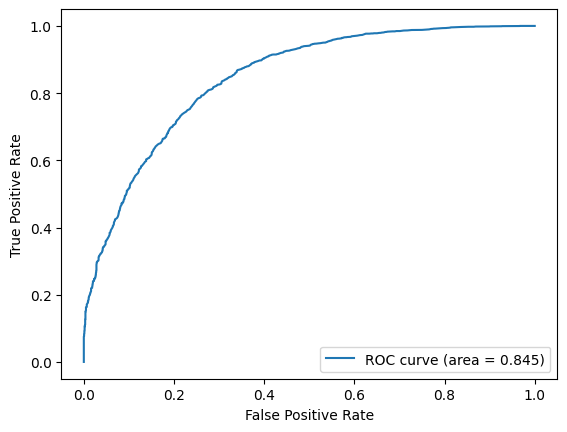

In [23]:
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_predict

scores_proba = cross_val_predict(LogisticRegression(), X, y, cv=5, method='predict_proba')[:, 1]
print(scores_proba)
print(scores_proba.shape)
fpr, tpr, thresholds = roc_curve(y,scores_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Each test came back with slightly lower scores

ROC/AUC 0.845 is still good for a single-feature logistic regression

These results are in line with our findings from (f), but using sklearn libraries made the task very fast and efficient.

# (h) Inference - Linear and Logistic Regression
1. Use the trained linear regression model and predict the PT08.S1(CO) value for the test
data.
2. Use the trained logistic regression model and predict the PT08.S1(CO) binary value (the
same label you created in step d) for the test data.
3. Save the predictions in a csv file with two main columns. One for the linear regression predictions with the name pred linear and one for the logistic regression predictions with the name pred logistic.
4. Add this csv file to your submission.

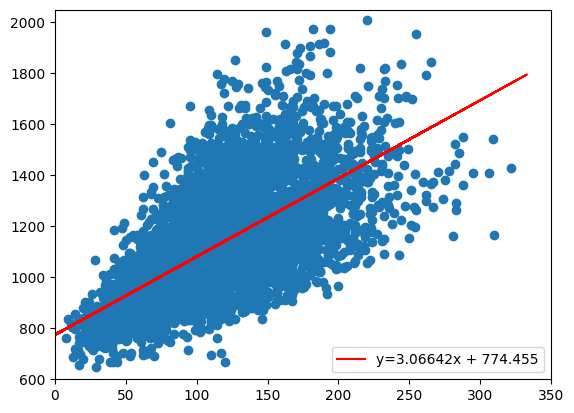

[[1096.42955187]
 [ 161.17156203]
 [1458.26706925]
 ...
 [ 943.10856993]
 [ 161.17156203]
 [1124.02732862]]


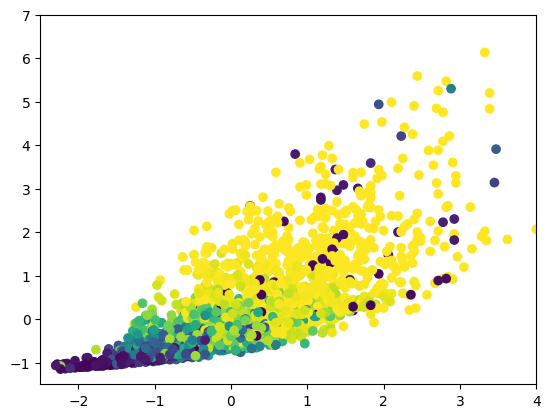

[[0.85480203]
 [0.18769068]
 [0.97532568]
 ...
 [0.06364873]
 [0.0068647 ]
 [0.64588294]]
      pred_linear  pred_logistic
0     1096.429552       0.854802
1      161.171562       0.187691
2     1458.267069       0.975326
3     1074.964614       0.765480
4     1035.101159       0.496348
...           ...            ...
3216  1200.687820       0.981061
3217   161.171562       0.008821
3218   943.108570       0.063649
3219   161.171562       0.006865
3220  1124.027329       0.645883

[3221 rows x 2 columns]


In [24]:
# 1
b0 = np.array(b0).mean()
b1 = np.array(b1).mean()
y = b0 + b1*test['NO2(GT)']
plt.scatter(cono['NO2(GT)'],cono['PT08.S1(CO)'])
plt.plot(test[['NO2(GT)']],y, color='r', label=f'y={round(b1,5)}x + {round(b0,3)}')
plt.xlim(0,350)
plt.ylim(600,2050)
plt.legend()
plt.show()
print(np.array([y]).T)

# 2
Xs = test.loc[(test['NO2(GT)']>-200) & (test['NOx(GT)']>-200) & (test['PT08.S5(O3)']>-200),['NO2(GT)','NOx(GT)','PT08.S5(O3)']]
X_test = test[['NO2(GT)','NOx(GT)','PT08.S5(O3)']]
for index, row in X_test.iterrows(): # normalize data x-u/σ
    X_test.at[index, 'NO2(GT)'] = (row['NO2(GT)'] - Xs['NO2(GT)'].mean()) / Xs['NO2(GT)'].std()
    X_test.at[index, 'NOx(GT)'] = (row['NOx(GT)'] - Xs['NOx(GT)'].mean()) / Xs['NOx(GT)'].std()
    X_test.at[index, 'PT08.S5(O3)'] = (row['PT08.S5(O3)'] - Xs['PT08.S5(O3)'].mean()) / Xs['PT08.S5(O3)'].std()
X_test = np.array(X_test)
X_extended = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
# average 4000 iteration LogisticRegression weights from the 5 folds
w = coeff[4000,0]
for i in range(5)[1:]:
    w += coeff[4000,i]
w /= 5
pred = expit(X_extended @ w)
plt.scatter(X_test[:, 0], X_test[:, 1], c = pred)
plt.xlim(-2.5,4)
plt.ylim(-1.5,7)
plt.show()
print(pred)

# 3
df = pd.concat([pd.Series(y),pd.Series(pred.reshape(-1))], axis=1)
df.rename(columns={0:'pred_logistic','NO2(GT)':'pred_linear'}, inplace=True)
print(df)
df.to_csv('Nicholas_Garde_preds.csv', index=False)


In [25]:
### /// ### /// ###
###   Scratch   ###
# # acc
# {0: {2000: 0.9572953736654805, 2500: 0.963226571767497, 3000: 0.9691577698695136, 3500: 0.970344009489917, 4000: 0.9727164887307236}, 
#     1: {2000: 0.9442467378410438, 2500: 0.9489916963226572, 3000: 0.9525504151838672, 3500: 0.9561091340450771, 4000: 0.9561091340450771}, 
#     2: {2000: 0.9453681710213777, 2500: 0.9501187648456056, 3000: 0.9572446555819477, 3500: 0.9608076009501187, 4000: 0.9667458432304038}, 
#     3: {2000: 0.9655581947743468, 2500: 0.9667458432304038, 3000: 0.9691211401425178, 3500: 0.9714964370546318, 4000: 0.9726840855106889}, 
#     4: {2000: 0.9406175771971497, 2500: 0.9477434679334917, 3000: 0.9536817102137767, 3500: 0.9560570071258907, 4000: 0.9572446555819477}} 
# # prec
# {0: {2000: 0.9813432835820896, 2500: 0.9833024118738405, 3000: 0.985239852398524, 3500: 0.9852670349907919, 4000: 0.9871086556169429}, 
#     1: {2000: 0.9746376811594203, 2500: 0.9765342960288809, 3000: 0.9766606822262118, 3500: 0.9802158273381295, 4000: 0.9802158273381295}, 
#     2: {2000: 0.9566854990583804, 2500: 0.9587242026266416, 3000: 0.9643527204502814, 3500: 0.9680451127819549, 4000: 0.9736346516007532}, 
#     3: {2000: 0.9851851851851852, 2500: 0.9852125693160814, 3000: 0.9852670349907919, 3500: 0.9871086556169429, 4000: 0.9871323529411765}, 
#     4: {2000: 0.969147005444646, 2500: 0.9694793536804309, 3000: 0.9714285714285714, 3500: 0.9732142857142857, 4000: 0.9732620320855615}} 
# # recall
# {0: {2000: 0.9528985507246377, 2500: 0.9601449275362319, 3000: 0.967391304347826, 3500: 0.9692028985507246, 4000: 0.9710144927536232}, 
#     1: {2000: 0.9422066549912435, 2500: 0.9474605954465849, 3000: 0.9527145359019265, 3500: 0.9544658493870403, 4000: 0.9544658493870403}, 
#     2: {2000: 0.9566854990583804, 2500: 0.9623352165725048, 3000: 0.967984934086629, 3500: 0.9698681732580038, 4000: 0.9736346516007532}, 
#     3: {2000: 0.9620253164556962, 2500: 0.9638336347197106, 3000: 0.9674502712477396, 3500: 0.969258589511754, 4000: 0.9710669077757685}, 
#     4: {2000: 0.9417989417989417, 2500: 0.9523809523809523, 3000: 0.9594356261022927, 3500: 0.9611992945326279, 4000: 0.9629629629629629}} 
# # f1
# {0: {2000: 0.9669117647058824, 2500: 0.9715857011915674, 3000: 0.9762340036563071, 3500: 0.9771689497716894, 4000: 0.9789954337899544}, 
#     1: {2000: 0.9581478183437222, 2500: 0.9617777777777777, 3000: 0.9645390070921985, 3500: 0.9671694764862466, 4000: 0.9671694764862466}, 
#     2: {2000: 0.9566854990583804, 2500: 0.9605263157894737, 3000: 0.9661654135338346, 3500: 0.9689557855126999, 4000: 0.9736346516007532}, 
#     3: {2000: 0.9734675205855444, 2500: 0.9744058500914077, 3000: 0.9762773722627737, 3500: 0.9781021897810219, 4000: 0.9790337283500455}, 
#     4: {2000: 0.9552772808586762, 2500: 0.9608540925266904, 3000: 0.9653948535936113, 3500: 0.9671694764862466, 4000: 0.9680851063829787}}
# # res
# {
#     2000: 
#     {'acc': [0.9572953736654805, 0.9442467378410438, 0.9453681710213777, 0.9655581947743468, 0.9406175771971497], 
#     'prec': [0.9813432835820896, 0.9746376811594203, 0.9566854990583804, 0.9851851851851852, 0.969147005444646], 
#     'recall': [0.9528985507246377, 0.9422066549912435, 0.9566854990583804, 0.9620253164556962, 0.9417989417989417], 
#     'f1': [0.9669117647058824, 0.9581478183437222, 0.9566854990583804, 0.9734675205855444, 0.9552772808586762]}, 
#     2500: 
#     {'acc': [0.963226571767497, 0.9489916963226572, 0.9501187648456056, 0.9667458432304038, 0.9477434679334917], 
#     'prec': [0.9833024118738405, 0.9765342960288809, 0.9587242026266416, 0.9852125693160814, 0.9694793536804309], 
#     'recall': [0.9601449275362319, 0.9474605954465849, 0.9623352165725048, 0.9638336347197106, 0.9523809523809523], 
#     'f1': [0.9715857011915674, 0.9617777777777777, 0.9605263157894737, 0.9744058500914077, 0.9608540925266904]}, 
#     3000: 
#     {'acc': [0.9691577698695136, 0.9525504151838672, 0.9572446555819477, 0.9691211401425178, 0.9536817102137767], 
#     'prec': [0.985239852398524, 0.9766606822262118, 0.9643527204502814, 0.9852670349907919, 0.9714285714285714], 
#     'recall': [0.967391304347826, 0.9527145359019265, 0.967984934086629, 0.9674502712477396, 0.9594356261022927], 
#     'f1': [0.9762340036563071, 0.9645390070921985, 0.9661654135338346, 0.9762773722627737, 0.9653948535936113]}, 
#     4000: 
#     {'acc': [0.9727164887307236, 0.9561091340450771, 0.9667458432304038, 0.9726840855106889, 0.9572446555819477], 
#     'prec': [0.9871086556169429, 0.9802158273381295, 0.9736346516007532, 0.9871323529411765, 0.9732620320855615], 
#     'recall': [0.9710144927536232, 0.9544658493870403, 0.9736346516007532, 0.9710669077757685, 0.9629629629629629], 
#     'f1': [0.9789954337899544, 0.9671694764862466, 0.9736346516007532, 0.9790337283500455, 0.9680851063829787]}}

# for col in train.columns:
#     print(col)
#     idx = train.loc[train[col]>-200,[col]]
#     print(len(idx))

# w = np.random.randn(3, 1)
# X = np.array(cono[['NO2(GT)','PT08.S1(CO)']])
# y = np.array(cono['mill'])
# n = X.shape[0]
# X_extended = np.concatenate([X, np.ones((n, 1))], axis=1)
# logits  = np.matmul(X_extended, w)

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.special import expit, logit
# x = np.linspace(-6, 6, 121)
# y = expit(x)
# plt.plot(x, y)
# plt.grid()
# plt.xlim(-6, 6)
# plt.xlabel('x')
# plt.title('expit(x)')
# plt.show()

# print(lr.coeffs[0])
# print(lr.coeffs[500])
# print(lr.coeffs[1000])

# test
# print(y.shape,pred.shape)
# df = pd.concat([pd.Series(pred.reshape(-1)),pd.Series(y)], axis=1)
# df.rename(columns={0:'pred logistic','NO2(GT)':'pred linear'}, inplace=True)

### /// ### /// ### σ